In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

## Plot Origin FSD

In [2]:
def draw_flow_size_distribution(fileNames):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    
    for fileName in fileNames: 
        print(fileName)
        flow_size = []
        frequency = []
        total_packets = 0
    
        with open(fileName, "r") as file:
            for line in file:
                items = line.strip().split(" ")
                flow_size.append(int(items[0]))
                frequency.append(int(items[1]))
                total_packets += int(items[0])*int(items[1])
            
            
        # Calculate mean and variance
        flow_sizes_array = np.array(flow_size)
        frequencies_array = np.array(frequency)

        mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
        variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
        # print("Mean Flow Size:", mean_flow_size)
        # print("Variance of Flow Size:", variance_flow_size)
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        print("Total Flows: ", total_flows)
        print("Total Packets: ", total_packets)
        print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(fileName.split("/")[-1][:-4])
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    
    for i in range(len(fs)):
        plt.plot(fs[i], prob[i], linestyle='-', label = labels[i])
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    plt.legend(loc="upper right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], linestyle='-', label = labels[i])
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right")
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
# draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0517-125w.txt
Total Flows:  1000
Total Packets:  30838
Density:  30
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0517-250w.txt
Total Flows:  1000
Total Packets:  17108
Density:  17
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0517-500w.txt
Total Flows:  1000
Total Packets:  19432
Density:  19
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0816-150w.txt
Total Flows:  1000
Total Packets:  38895
Density:  38
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0816-300w.txt
Total Flows:  1000
Total Packets:  30744
Density:  30
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0816-600w.txt
Total Flows:  1000
Total Packets:  39782
Density:  39
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2a-150w.txt


/tmp/ipykernel_28067/3322723123.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_28067/3322723123.py:76: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


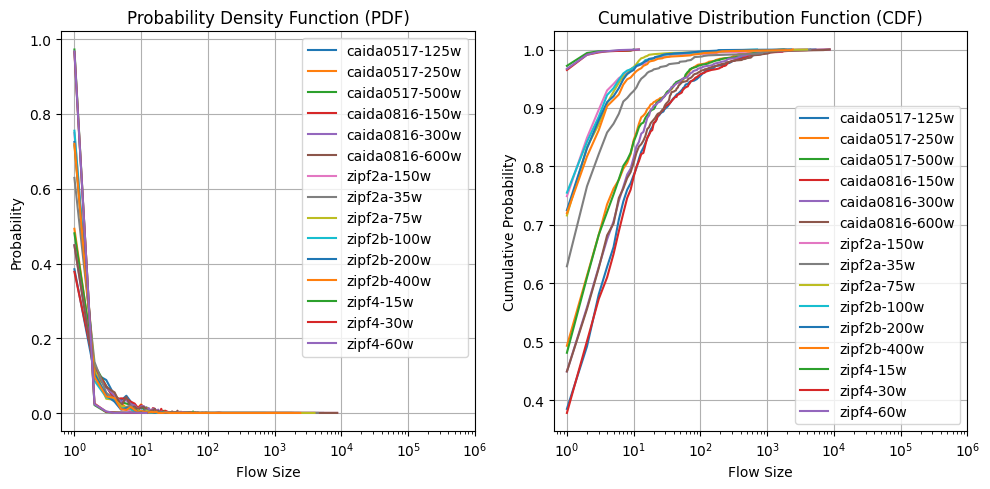

/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0517-125w.txt
Total Flows:  1000
Total Packets:  30838
Density:  30
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0517-250w.txt
Total Flows:  1000
Total Packets:  17108
Density:  17
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0517-500w.txt
Total Flows:  1000
Total Packets:  19432
Density:  19


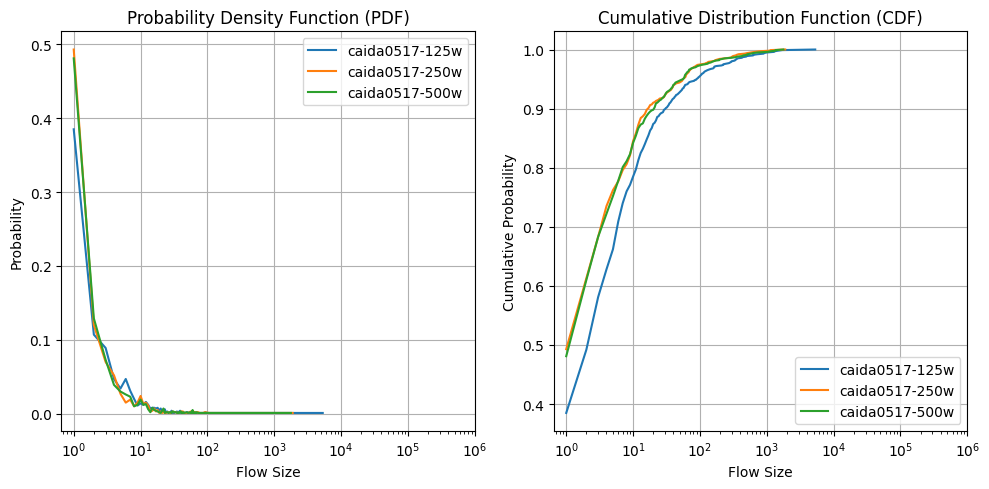

/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0816-150w.txt
Total Flows:  1000
Total Packets:  38895
Density:  38
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0816-300w.txt
Total Flows:  1000
Total Packets:  30744
Density:  30
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/caida0816-600w.txt
Total Flows:  1000
Total Packets:  39782
Density:  39


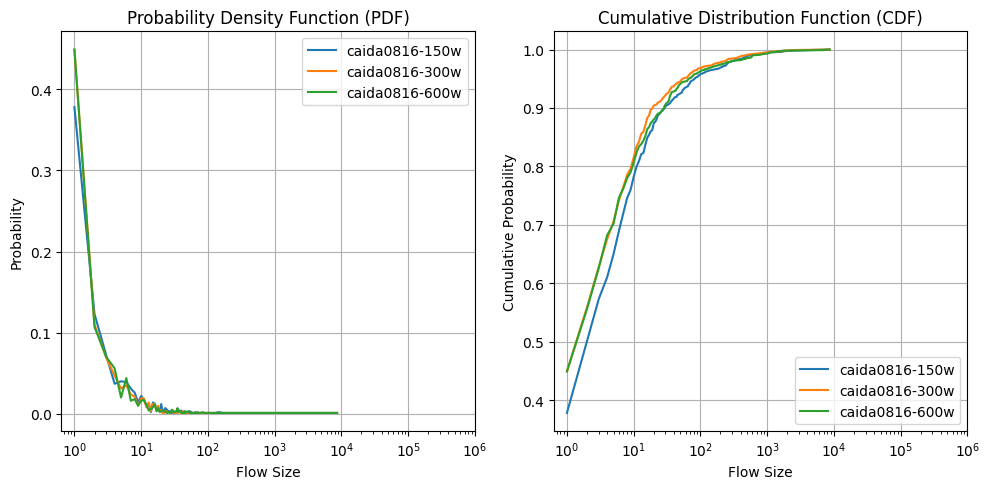

/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2a-150w.txt
Total Flows:  1000
Total Packets:  9335
Density:  9
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2a-35w.txt
Total Flows:  1000
Total Packets:  18590
Density:  18
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2a-75w.txt
Total Flows:  1000
Total Packets:  7815
Density:  7


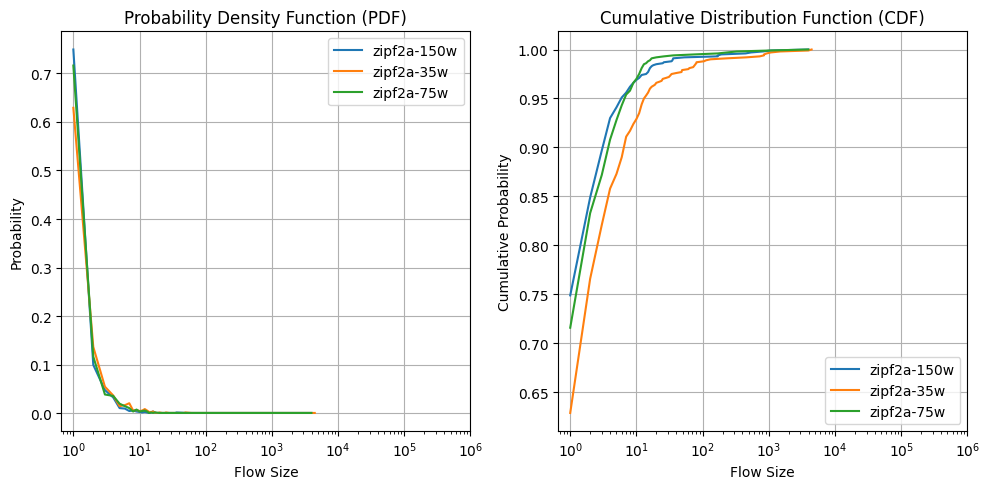

/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2b-100w.txt
Total Flows:  1000
Total Packets:  3832
Density:  3
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2b-200w.txt
Total Flows:  1000
Total Packets:  5047
Density:  5
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf2b-400w.txt
Total Flows:  1000
Total Packets:  8457
Density:  8


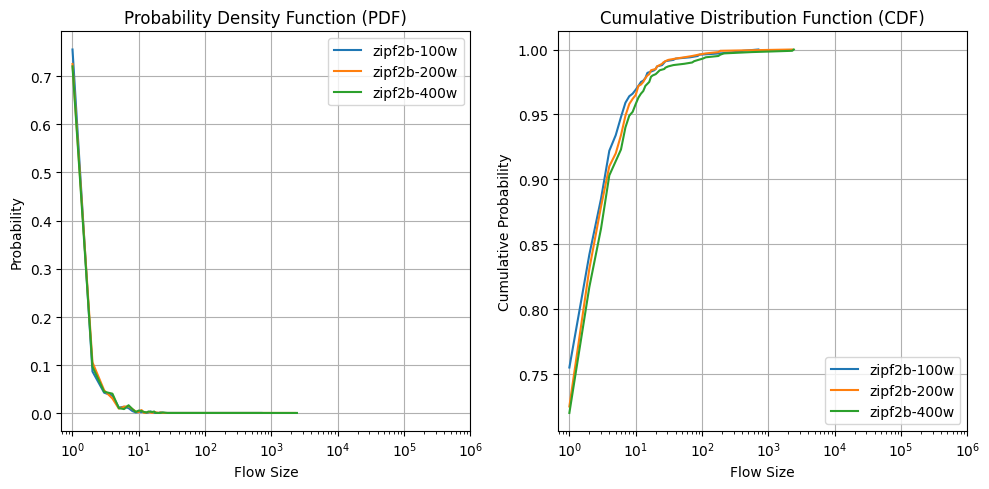

/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf4-15w.txt
Total Flows:  1000
Total Packets:  1054
Density:  1
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf4-30w.txt
Total Flows:  1000
Total Packets:  1067
Density:  1
/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/zipf4-60w.txt
Total Flows:  1000
Total Packets:  1058
Density:  1


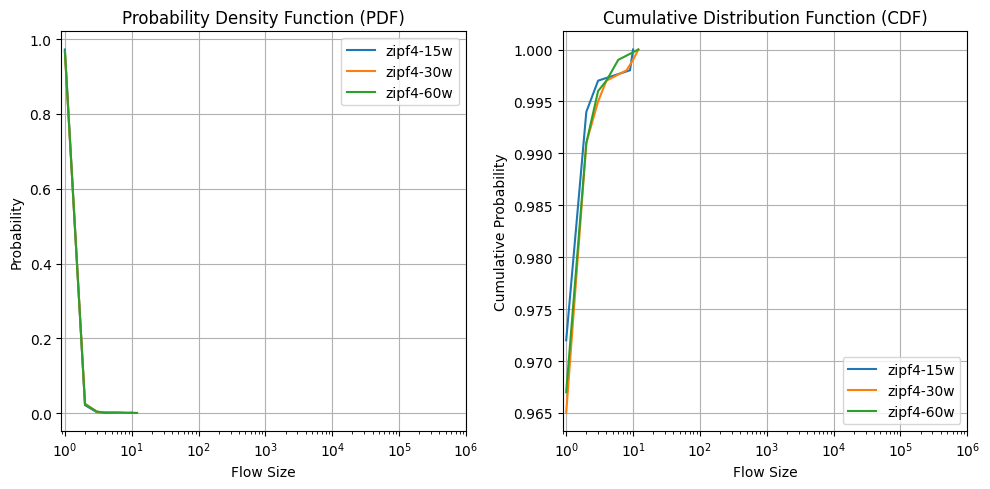

In [17]:
pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/sampled_fs_dist/"
pcap_file = []
for file_name in sorted(os.listdir(pcap_folder)):
    file_path = pcap_folder + file_name
    pcap_file.append(file_path)
    
# for file in pcap_file:
#     draw_flow_size_distribution(file)
#     break

draw_flow_size_distribution(pcap_file)
# draw_flow_size_distribution(pcap_file[::3])
draw_flow_size_distribution(pcap_file[:3])
draw_flow_size_distribution(pcap_file[3:6])
draw_flow_size_distribution(pcap_file[6:9])
draw_flow_size_distribution(pcap_file[9:12])
draw_flow_size_distribution(pcap_file[12:15])


## Prepare dataset

In [12]:
def read_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_gt_summation")
                # dynamic_full_path = os.path.join(path, dir, window_dir, "randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [5]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 

# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
# for a in caida0517:
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # same dist, zipf
# for a in zipf2a:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf2b:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
# for a in caida0517:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf2b
# for a in caida0517:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
# for a in zipf2a:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    # for b in caida0816:
    #     for l in lens:
    #         pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
# for a in zipf2b:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
# for a in zipf2b:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap']
Total Pcap File Number: 12


### Plot Density Variation

In [6]:
def plot_density_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):

    labels = ["Random K Density"]

    res = []
    # sum
    result = read_fsd_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    acc_fs = []
    for fsd in result:
        tfs = 0
        fn = 0
        for size, freq in fsd.items():
            fn += freq
            tfs += (size*freq)
        
        # print(fn, tfs)
            
        acc_fs.append(int(tfs))
    
    print(acc_fs)
        
    # variation
    var_fs = [None]
    var_fs.append(int(round(acc_fs[0]/1000)))
    for i in range(1, len(acc_fs)):
        # print(acc_fs[i], acc_fs[i-1], (acc_fs[i] - acc_fs[i-1]))
        var_fs.append(int(round((acc_fs[i] - acc_fs[i-1])/1000)))
    
    res.append(var_fs)
    print(sum(var_fs[1:])/len(var_fs[1:]))
    # print(labels, len(labels))
    # print(res, len(res))
    # print(result)
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Ratio')
    plt.title('%s Random K Density (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

[16725, 21258, 30191, 35507, 47953, 51627, 56204, 62803, 77959, 91885, 96428, 102789, 122007, 114417, 118861, 138286, 141859, 149733, 172949, 157064, 193192, 177870, 193595, 198967, 193852, 216247, 230180, 238928, 248368, 243096, 268598, 306098, 273512, 277642, 287383, 293873, 307361, 308252, 324655, 323607, 340961, 333911, 360420, 364460, 382431, 375590, 370446, 427191]
8.895833333333334


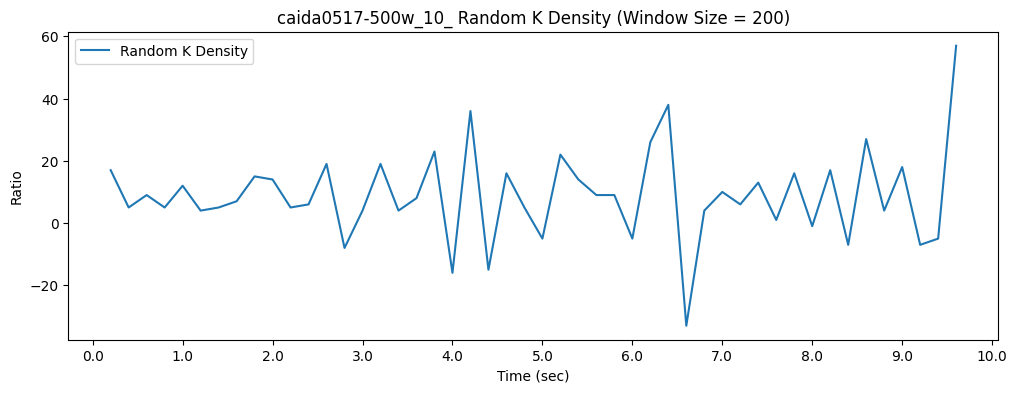

[10494, 13572, 16937, 22383, 20682, 26949, 33995, 36496, 40243, 39547, 54449, 44785, 57912, 51557, 61274, 87304, 66327, 67593, 62369, 67313, 99010, 76139, 87475, 82649, 105951, 93422, 113244, 103068, 105948, 106877, 119009, 111080, 122981, 124615, 115981, 118059, 140325, 136516, 129212, 136006, 136496, 133195, 138635, 166730, 157541, 165092, 151350, 143194]
2.9375


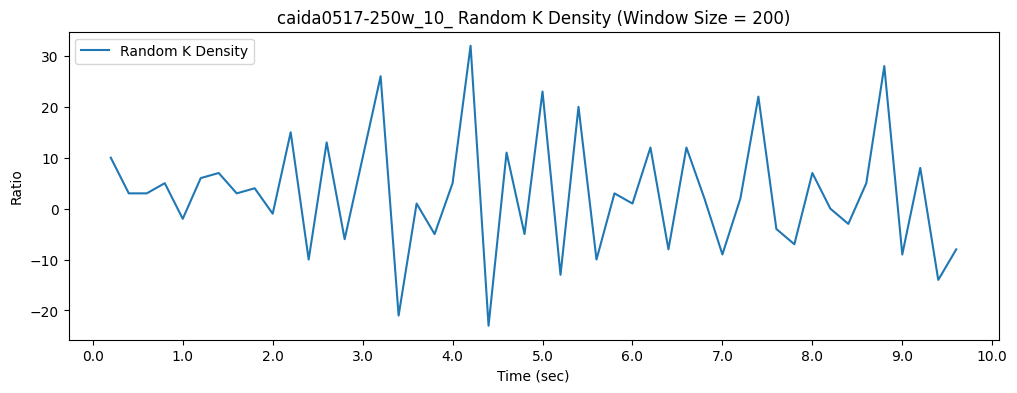

[8505, 9432, 9968, 10969, 14543, 17987, 25799, 20927, 25581, 33390, 34685, 36987, 29849, 26375, 38575, 40785, 33944, 36368, 42662, 40114, 52728, 35517, 69707, 62510, 50786, 64637, 79958, 63021, 59367, 54772, 55410, 52925, 71821, 44759, 76842, 75170, 58662, 73493, 62479, 79337, 71728, 84552, 63355, 70778, 88316, 92723, 73762, 86331]
1.7916666666666667


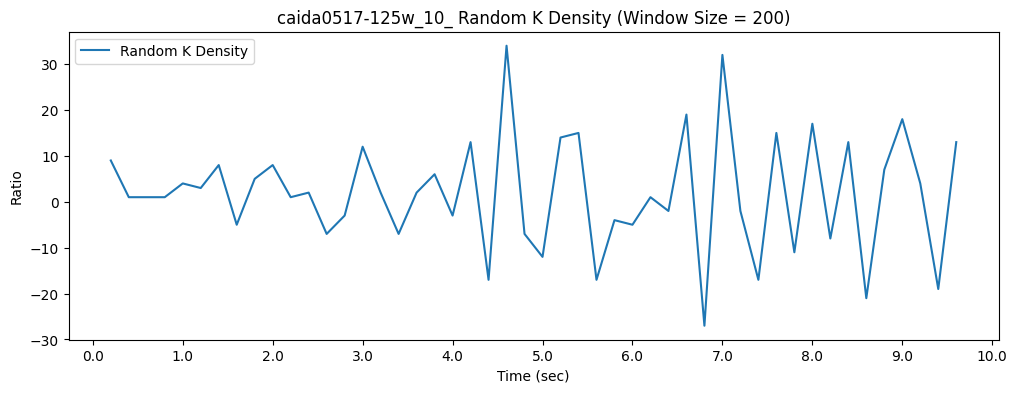

[13291, 22052, 35702, 43355, 51868, 66562, 78931, 91083, 91300, 105425, 109561, 120997, 130071, 140866, 150329, 154777, 164964, 178966, 177525, 198047, 216107, 219060, 209634, 238302, 235424, 231151, 257989, 256050, 297315, 276602, 306466, 358466, 319207, 355525, 312418, 362781, 374559, 362620, 374075, 365542, 401527, 434100, 412863, 443229, 447631, 465157, 455594, 449685, 481664, 497716]
9.94


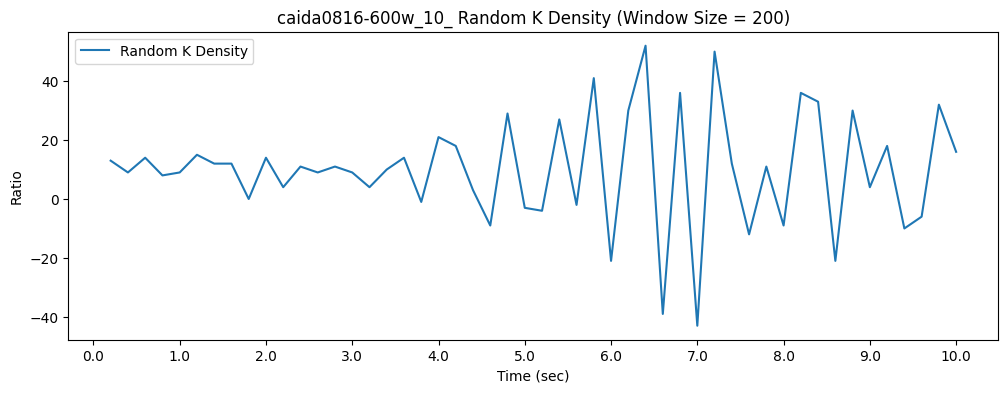

[9888, 19894, 16428, 21103, 31474, 32963, 32221, 39353, 44245, 50767, 60234, 58892, 54993, 65170, 66697, 78710, 74239, 91200, 87467, 83298, 82564, 95287, 90477, 110179, 110646, 104669, 104895, 115587, 114992, 124313, 116728, 124436, 134376, 122094, 138472, 146707, 147849, 159221, 174311, 151058, 167970, 166956, 159949, 179641, 191719, 172967, 177922, 193964, 182849, 204256]
4.06


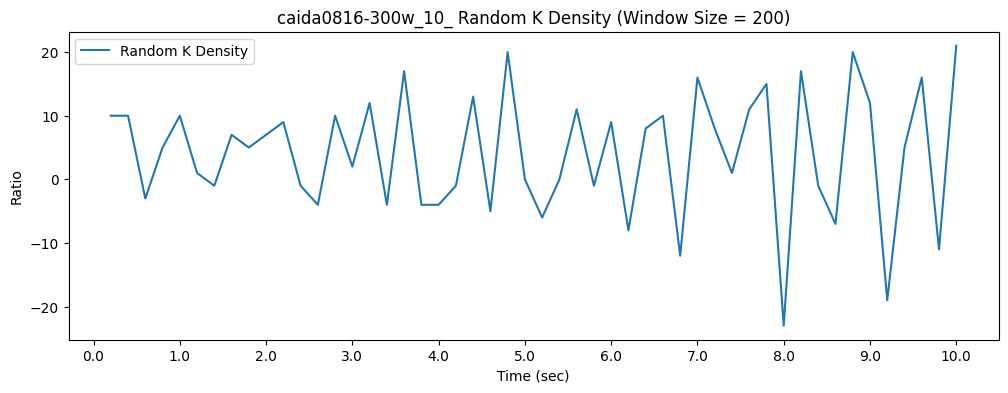

[9149, 12768, 20815, 16735, 23717, 22988, 24842, 32847, 22760, 37368, 33567, 34362, 34488, 28938, 45764, 43268, 56656, 72182, 51631, 53127, 55662, 54036, 43520, 51843, 88162, 95177, 69868, 67960, 59923, 61901, 79972, 66131, 78364, 66339, 115781, 67988, 74937, 94029, 70194, 71307, 73389, 84186, 84861, 83767, 73816, 115258, 86425, 83730, 88032, 113382]
2.2


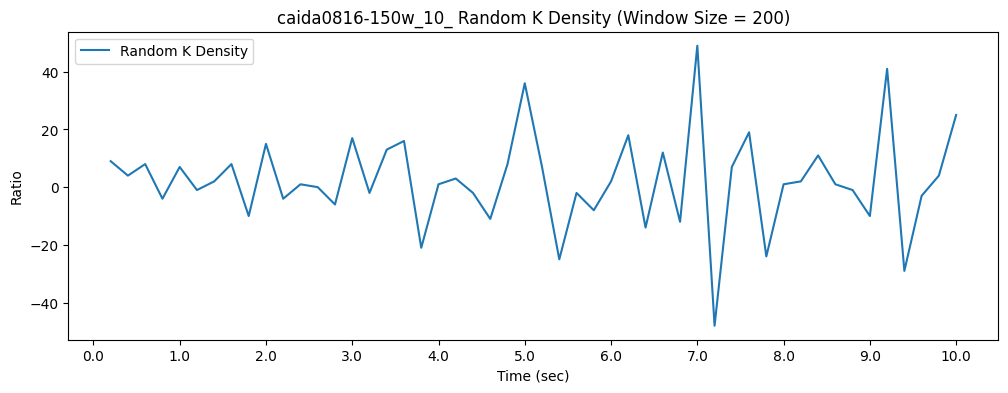

[6626, 7670, 9531, 12416, 13666, 13205, 15029, 27704, 17309, 12107, 17959, 17397, 21305, 35492, 31676, 36442, 23841, 40322, 28410, 29986, 28481, 49246, 39984, 31325, 32186, 33474, 38802, 33920, 44697, 41926, 49345, 35981, 38351, 39584, 46767, 40965, 52056, 44540, 48711, 41901, 43699, 42823, 53755, 45689, 44714, 45022, 72309, 47100, 61095, 67440]
1.3


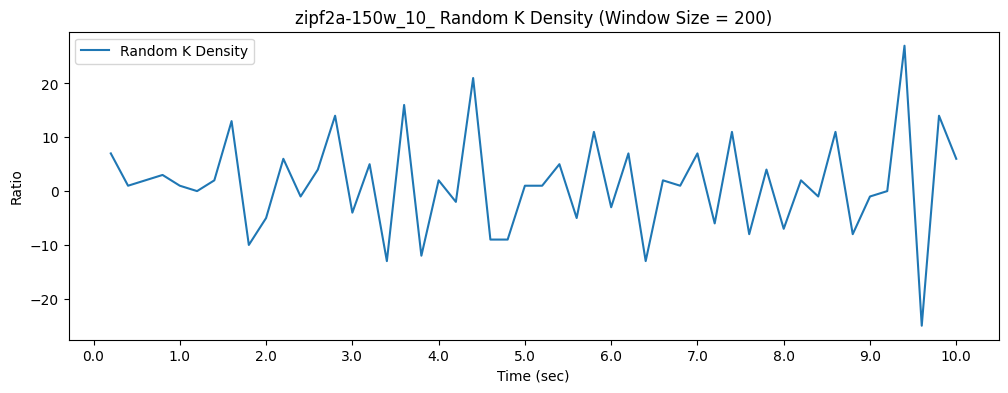

[7049, 8675, 13330, 9830, 13694, 7282, 11699, 12079, 13365, 37401, 28352, 12124, 12897, 10864, 14447, 12030, 16670, 15150, 12837, 29434, 29574, 23469, 25059, 22173, 14909, 20476, 34197, 23651, 26618, 20734, 26870, 18295, 34532, 22975, 53352, 46086, 19646, 33137, 28791, 37886, 24900, 20650, 22221, 27759, 26278, 25388, 28614, 43709, 32112, 41185]
0.86


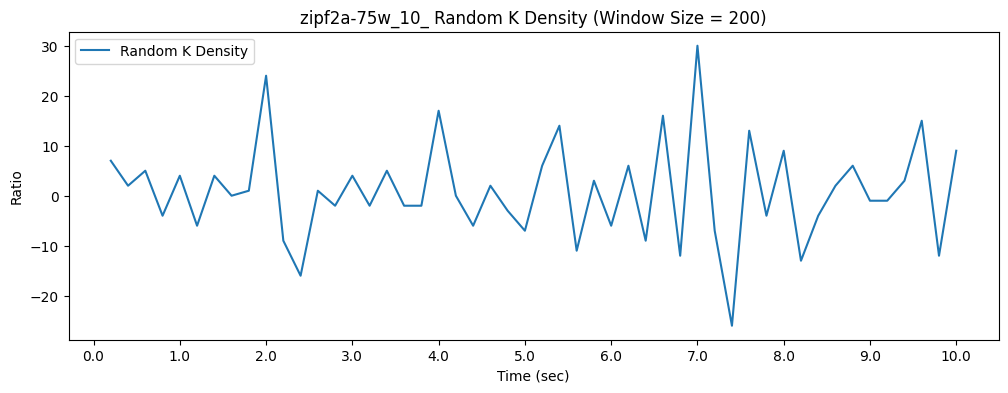

[7247, 8712, 8606, 11395, 15133, 11034, 15117, 10848, 12581, 12631, 11696, 8835, 17354, 15097, 13942, 26651, 19162, 17320, 9647, 18476, 15527, 17000, 12343, 24780, 16693, 12968, 15282, 22051, 18109, 26809, 20582, 11945, 24446, 16643, 19180, 32189, 19165, 23929, 21051, 10793, 21093, 23160, 27468, 32836, 14614, 30844, 13862, 18332, 16188, 19782]
0.4


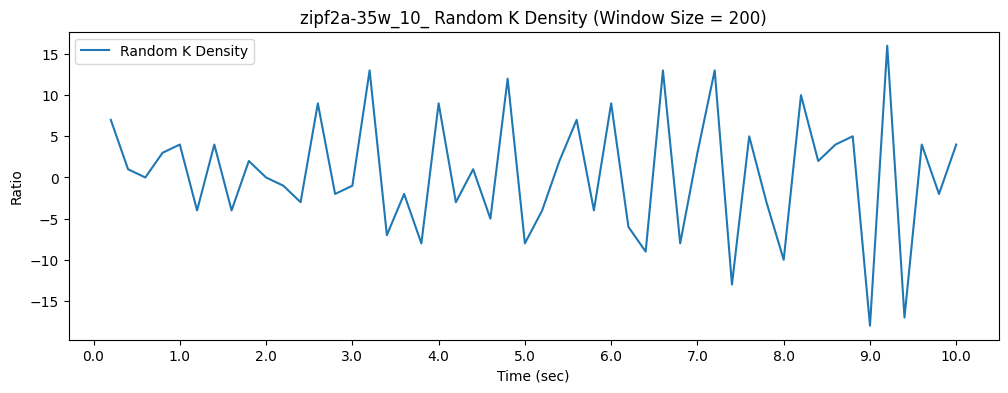

[9840, 16655, 22960, 30643, 29239, 35549, 42822, 56531, 48363, 53236, 59109, 64658, 65915, 71588, 77239, 76056, 84139, 94641, 99708, 102010, 99988, 108993, 105747, 114574, 113564, 128295, 129674, 124773, 138001, 133253, 140243, 151228, 166250, 150347, 164574, 170816, 183932, 174137, 178061, 189101, 185635, 180852, 197887, 211545, 215169, 207173, 211736, 210072, 224054, 225570]
4.56


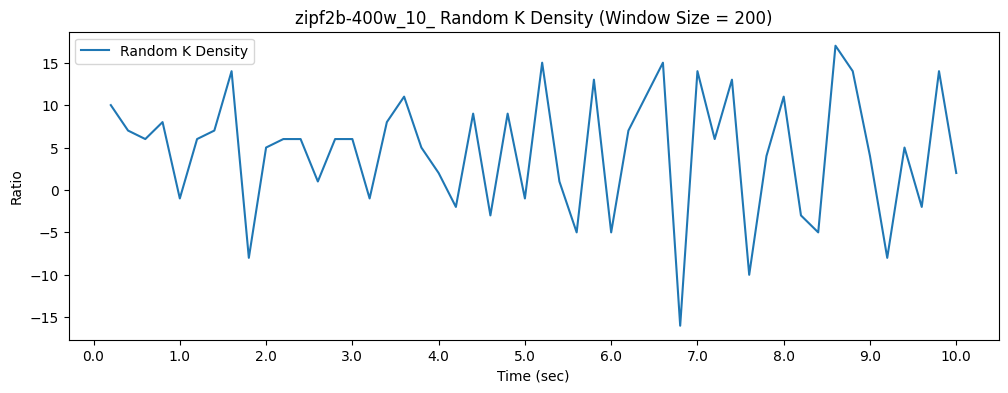

[6880, 7493, 11941, 15999, 15599, 21439, 19516, 18643, 22659, 25382, 27327, 32711, 28427, 50117, 34758, 33541, 39915, 39100, 42940, 42267, 43554, 40957, 45578, 60702, 48822, 56658, 52252, 53830, 50030, 62321, 60095, 60165, 71954, 60718, 67441, 67377, 78376, 66805, 67653, 72741, 71816, 80903, 82368, 80177, 79023, 80852, 90508, 101114, 85013, 110314]
2.24


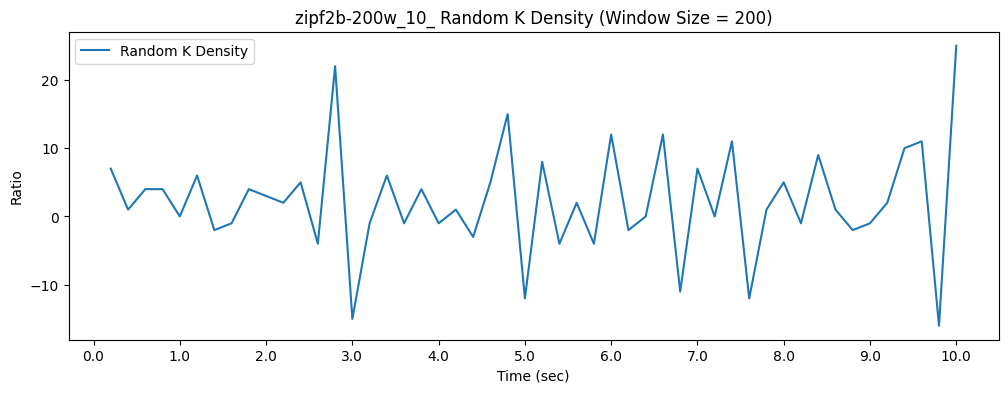

[5682, 4701, 6741, 10457, 11714, 14688, 10479, 12653, 21715, 15461, 11901, 24198, 22039, 18925, 17039, 17732, 19944, 23469, 22904, 19098, 20292, 20787, 28096, 28226, 22322, 24195, 26789, 26805, 24587, 23247, 29729, 32779, 29681, 33033, 27142, 31191, 30134, 39537, 39085, 61775, 46146, 36405, 50923, 41921, 33989, 35303, 38634, 38415, 38009, 41117]
0.8


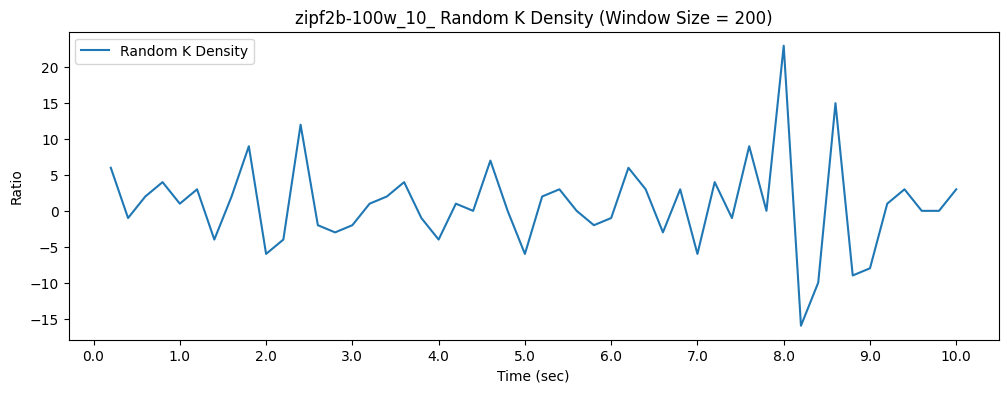

In [7]:
for file in pcap_file:
    plot_density_variation(dataset=file)

### Plot Quantized FSD

In [8]:
def prepare_profiler_bins():
    res = {}
    
    profiler_path = "../traffic_generator/fs_dist/"
    profiler_fsd = []
    for file in sorted(os.listdir(profiler_path)):
        profiler_fsd.append(file)
        
    for file in profiler_fsd:
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
                
        # calcualte CDF
        cdf = {}
        culmulative_prob = 0.0
        for fs, freq in sorted(fsd.items()):
            culmulative_prob += (freq/fn)
            cdf[fs] = culmulative_prob
            
        # get bins
        bin = {}
        idx = 0
        for fs, prob in sorted(cdf.items()):
            while idx < round(prob * 100):
                bin[idx] = fs
                idx += 1
                
        res[file[:-4]] = bin
            
    return res
    
# prepare_profiler_bins()

In [9]:
def get_quantized_mapping(fsd, bins):
    qfsd = {}
    idx = 0
    for fs, freq in sorted(fsd.items()):
        while fs > bins[idx]:
            if idx < len(bins) - 1:
                idx += 1
            else:
                break
            
        if bins[idx] in qfsd.keys():
            qfsd[bins[idx]] += freq
        else:
            qfsd[bins[idx]] = freq
            
        
    return qfsd

In [14]:
def plot_quantized_fsd(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-500w_10_.pcap', window_size=200, profiler='caida0517-500w'):
    
    bins = prepare_profiler_bins()[profiler]
    fsd = read_fsd_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    print(bins)
    # for a in fsd:
    #     print(a)
    
    qfsd = []
        
    # get profiler qfsd
    profiler_fsd_path = f'/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/{profiler}.txt'
    profiler_fsd = {}
    with open(profiler_fsd_path, 'r') as f:
        for line in f:
            profiler_fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])        
    profiler_qfsd = get_quantized_mapping(profiler_fsd, bins) 
    qfsd.append(profiler_qfsd)
    
    # get each window qfsd
    for item in fsd:
        qfsd.append(get_quantized_mapping(item, bins))
        
    print(qfsd)
        
    # plot CDF
    fs = []
    prob = []
    cdfs = []
    labels = [profiler]
    
    
    for single_qfsd in qfsd:
        flow_size = []
        frequency = []
        total_packets = 0
        
        for flows, freq in single_qfsd.items():
            flow_size.append(flows)
            frequency.append(freq)
            total_packets = flows*freq
        
        # Plot PDF & CDF
        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        # print(flow_size)
        # print("Total Flows: ", total_flows)
        # print("Total Packets: ", total_packets)
        # print("Density: ", int(total_packets/total_flows))
        # print(probabilities)
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        
    # plot every second
    for t in range(1):
        start = 1 + t*5
        end = min(len(fs), 6 + t*5)
        # end = len(fs)
        
        plt.figure(figsize=(10, 5))
        plt.suptitle(f'{profiler} {start} {end}')
        # Plot PDF
        plt.subplot(1, 2, 1)
        
        plt.plot(fs[0], prob[0], linestyle='-', label = labels[0], color='black', linewidth=3.0)
        # for i in range(len(fs)):
        for i in range(start, end):
            plt.plot(fs[i], prob[i], linestyle='-')
        
        # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
        plt.title('Probability Density Function (PDF)')
        plt.xlabel('Flow Size')
        plt.ylabel('Probability')
        plt.legend(loc="upper right")
        
        plt.xscale('log')  # Set x-axis scale to logarithmic
        plt.xlim([-10,10000])
        plt.xticks([1, 10, 100, 1000, 10000])  # Set specific tick positions
        plt.grid(True)
        
        # Plot CDF
        plt.subplot(1, 2, 2)
        # for i in range(len(fs)):
        plt.plot(fs[0], cdfs[0], linestyle='-', label=labels[0], color='black', linewidth=3.0)
        for i in range(start, end):
            plt.plot(fs[i], cdfs[i], linestyle='-')
        plt.title('Cumulative Distribution Function (CDF)')
        plt.xlabel('Flow Size')
        plt.ylabel('Cumulative Probability')
        plt.legend(loc="lower right")
        
        plt.xscale('log')  # Set x-axis scale to logarithmic
        plt.xlim([-10,100000])
        plt.xticks([1, 10, 100, 1000, 10000])  # Set specific tick positions

        plt.grid(True)
        
        
        plt.tight_layout()
        plt.show()
    


{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 5, 60: 5, 61: 5, 62: 5, 63: 6, 64: 6, 65: 6, 66: 7, 67: 7, 68: 7, 69: 8, 70: 8, 71: 9, 72: 9, 73: 10, 74: 10, 75: 11, 76: 11, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 18, 83: 19, 84: 21, 85: 23, 86: 26, 87: 30, 88: 34, 89: 39, 90: 45, 91: 53, 92: 64, 93: 79, 94: 100, 95: 134, 96: 187, 97: 303, 98: 550, 99: 1541}
[{1: 37033, 2: 13629, 3: 7994, 4: 5113, 5: 3869, 6: 3821, 7: 2746, 8: 2234, 9: 1934, 10: 2318, 11: 1847, 12: 1578, 13: 1188, 14: 1015, 15: 900, 16: 944, 18: 1399, 19: 572, 21: 1131, 23: 868, 26: 1139, 30: 1307, 34: 1005, 39: 1022, 45: 1004, 53: 1060, 64: 1028, 79: 1087, 100:

/tmp/ipykernel_28067/2561042915.py:83: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_28067/2561042915.py:99: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


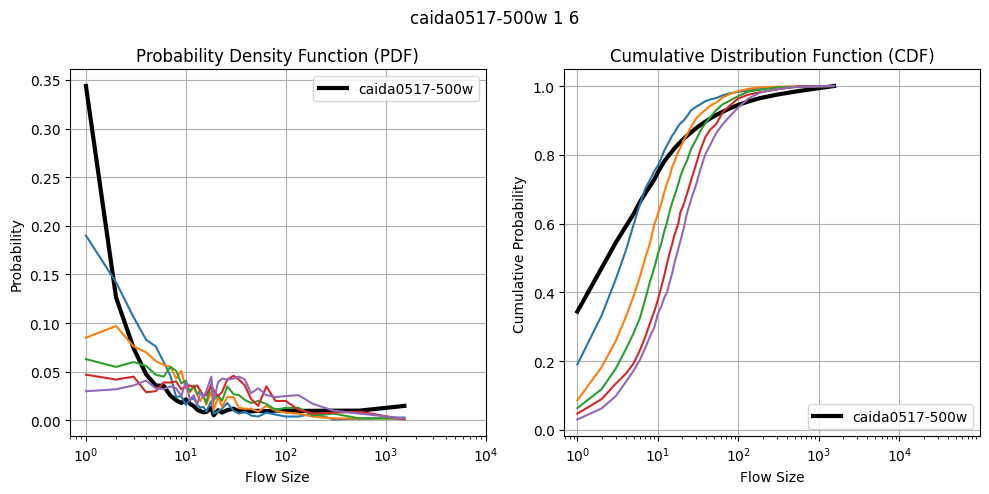

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 5, 60: 5, 61: 5, 62: 5, 63: 6, 64: 6, 65: 6, 66: 7, 67: 7, 68: 7, 69: 8, 70: 8, 71: 9, 72: 9, 73: 10, 74: 10, 75: 11, 76: 12, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 18, 83: 19, 84: 21, 85: 24, 86: 26, 87: 30, 88: 34, 89: 39, 90: 45, 91: 54, 92: 65, 93: 79, 94: 100, 95: 133, 96: 185, 97: 299, 98: 550, 99: 1494}
[{1: 18567, 2: 6745, 3: 3993, 4: 2577, 5: 1870, 6: 1885, 7: 1379, 8: 1097, 9: 957, 10: 1172, 11: 960, 12: 782, 13: 612, 14: 507, 15: 463, 16: 478, 18: 704, 19: 282, 21: 587, 24: 646, 26: 349, 30: 661, 34: 486, 39: 504, 45: 499, 54: 589, 65: 535, 79: 492, 100: 545, 133: 537, 

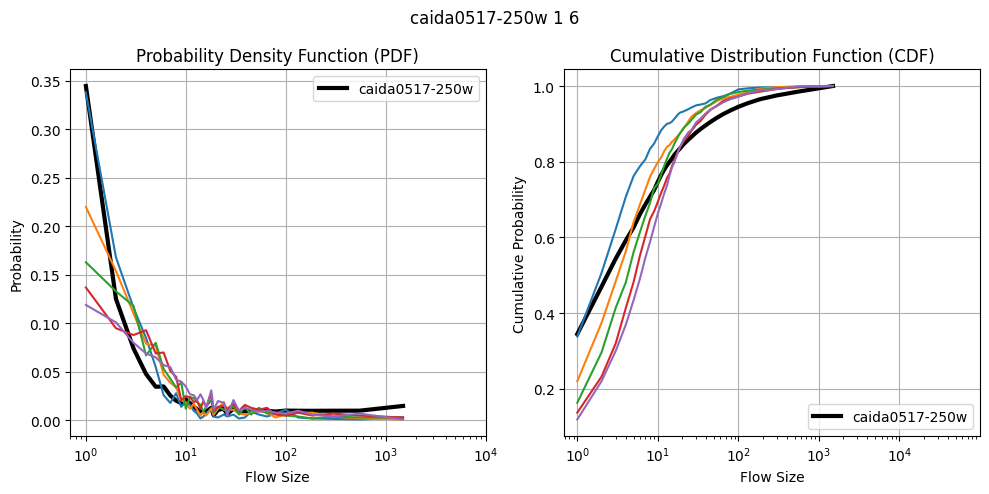

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 5, 60: 5, 61: 5, 62: 5, 63: 6, 64: 6, 65: 6, 66: 6, 67: 7, 68: 7, 69: 8, 70: 8, 71: 9, 72: 9, 73: 10, 74: 10, 75: 11, 76: 11, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 17, 83: 19, 84: 21, 85: 23, 86: 26, 87: 30, 88: 34, 89: 38, 90: 44, 91: 52, 92: 63, 93: 77, 94: 97, 95: 131, 96: 183, 97: 293, 98: 537, 99: 1608}
[{1: 9271, 2: 3371, 3: 2027, 4: 1263, 5: 995, 6: 988, 7: 682, 8: 577, 9: 463, 10: 558, 11: 476, 12: 368, 13: 295, 14: 249, 15: 230, 16: 249, 17: 165, 19: 311, 21: 274, 23: 229, 26: 286, 30: 312, 34: 258, 38: 224, 44: 266, 52: 272, 63: 265, 77: 268, 97: 271, 131: 266, 183: 267

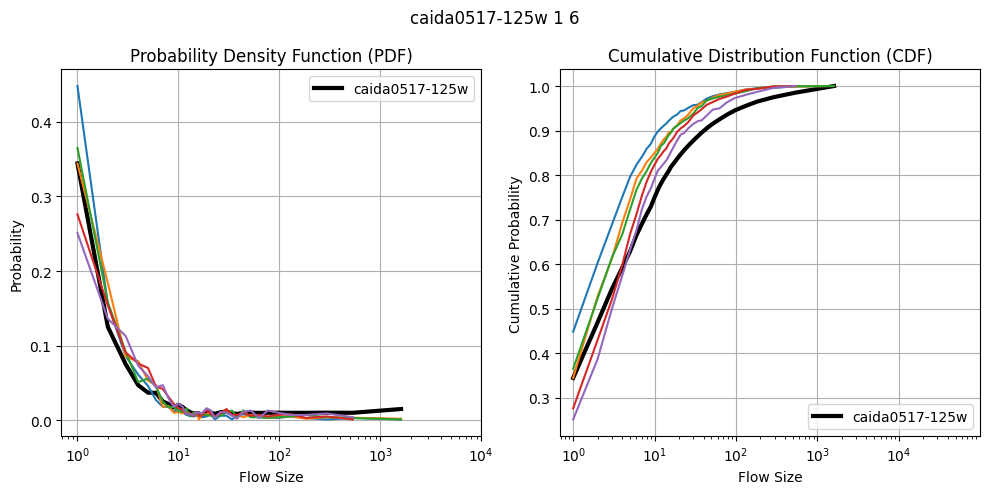

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 5, 59: 5, 60: 5, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 8, 68: 8, 69: 9, 70: 9, 71: 10, 72: 10, 73: 11, 74: 11, 75: 12, 76: 12, 77: 13, 78: 14, 79: 15, 80: 16, 81: 18, 82: 19, 83: 21, 84: 23, 85: 26, 86: 29, 87: 33, 88: 38, 89: 44, 90: 52, 91: 62, 92: 75, 93: 93, 94: 119, 95: 159, 96: 230, 97: 368, 98: 682, 99: 1789}
[{1: 38344, 2: 13472, 3: 7950, 4: 5630, 5: 3912, 6: 4176, 7: 2681, 8: 2285, 9: 1878, 10: 2622, 11: 1989, 12: 1894, 13: 1270, 14: 1161, 15: 1139, 16: 1202, 18: 1496, 19: 628, 21: 1315, 23: 983, 26: 1178, 29: 1011, 33: 1152, 38: 1133, 44: 1010, 52: 1161, 62: 1094, 75: 1114, 

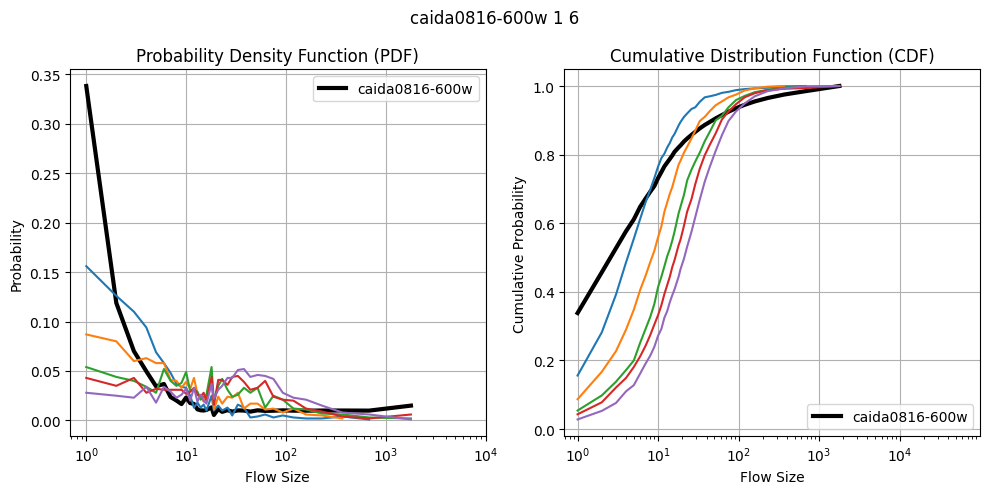

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 5, 59: 5, 60: 5, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 8, 68: 8, 69: 9, 70: 9, 71: 10, 72: 10, 73: 11, 74: 11, 75: 12, 76: 12, 77: 13, 78: 14, 79: 15, 80: 16, 81: 18, 82: 19, 83: 21, 84: 23, 85: 26, 86: 29, 87: 33, 88: 38, 89: 44, 90: 52, 91: 62, 92: 75, 93: 93, 94: 118, 95: 155, 96: 220, 97: 355, 98: 654, 99: 1722}
[{1: 19082, 2: 6713, 3: 3976, 4: 2904, 5: 1984, 6: 2058, 7: 1363, 8: 1147, 9: 947, 10: 1298, 11: 956, 12: 944, 13: 633, 14: 593, 15: 581, 16: 611, 18: 743, 19: 328, 21: 635, 23: 502, 26: 576, 29: 507, 33: 575, 38: 573, 44: 521, 52: 580, 62: 567, 75: 568, 93: 564, 118: 561,

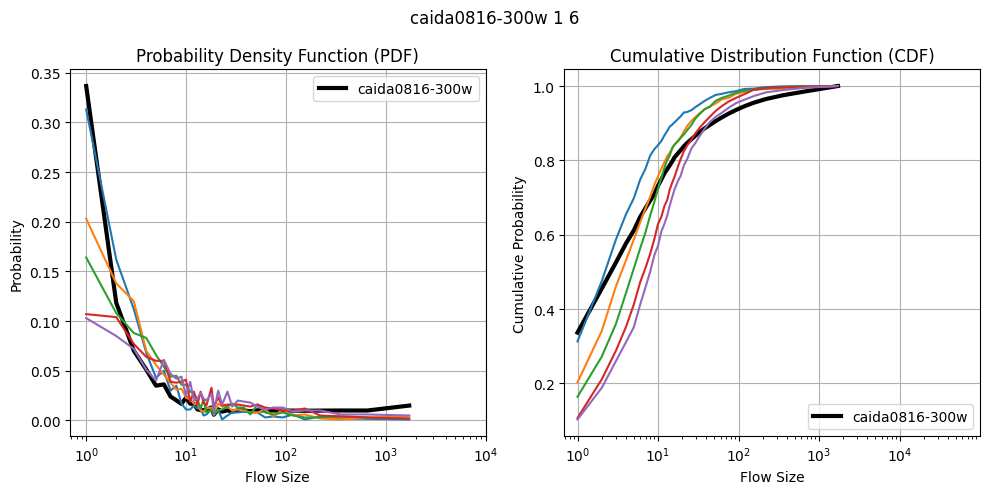

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 5, 59: 5, 60: 5, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 8, 68: 8, 69: 9, 70: 9, 71: 10, 72: 10, 73: 11, 74: 11, 75: 12, 76: 13, 77: 14, 78: 14, 79: 15, 80: 16, 81: 18, 82: 19, 83: 21, 84: 23, 85: 26, 86: 29, 87: 33, 88: 38, 89: 45, 90: 53, 91: 62, 92: 76, 93: 94, 94: 119, 95: 157, 96: 221, 97: 369, 98: 689, 99: 1728}
[{1: 9562, 2: 3328, 3: 1997, 4: 1484, 5: 979, 6: 1011, 7: 665, 8: 583, 9: 455, 10: 650, 11: 478, 12: 474, 13: 299, 14: 289, 15: 296, 16: 307, 18: 385, 19: 164, 21: 326, 23: 266, 26: 278, 29: 257, 33: 299, 38: 265, 45: 312, 53: 258, 62: 270, 76: 297, 94: 281, 119: 279, 157:

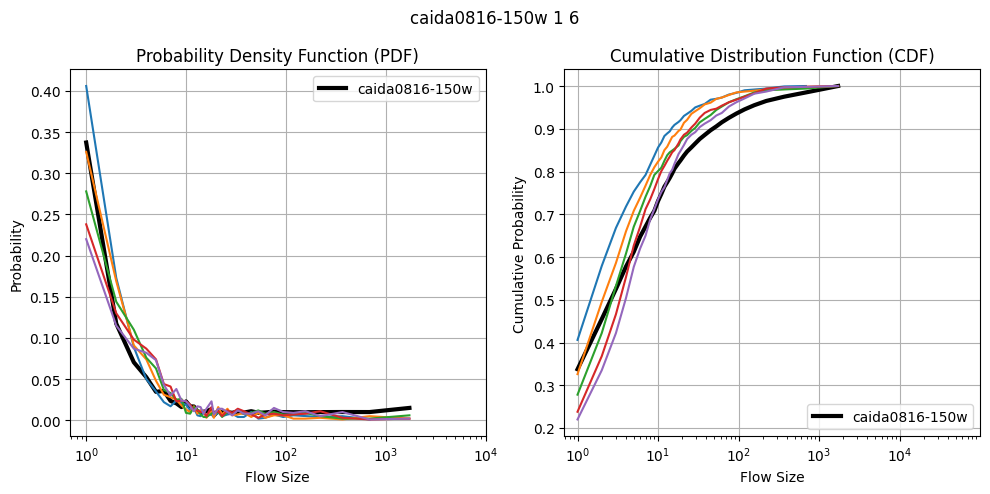

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 5, 87: 5, 88: 5, 89: 6, 90: 7, 91: 8, 92: 9, 93: 10, 94: 12, 95: 15, 96: 22, 97: 38, 98: 88, 99: 523}
[{1: 50438, 2: 9799, 3: 4092, 4: 2519, 5: 1847, 6: 1113, 7: 920, 8: 654, 9: 494, 10: 544, 12: 775, 15: 722, 22: 829, 38: 728, 88: 746, 523: 1158}, {1: 568, 2: 184, 3: 60, 4: 33, 5: 18, 6: 16, 7: 13, 8: 4, 9: 9, 10: 10, 12: 13, 15: 10, 22: 22, 38: 14, 88: 19, 523: 7}, {1: 471, 2: 192, 3: 102, 4: 53, 5

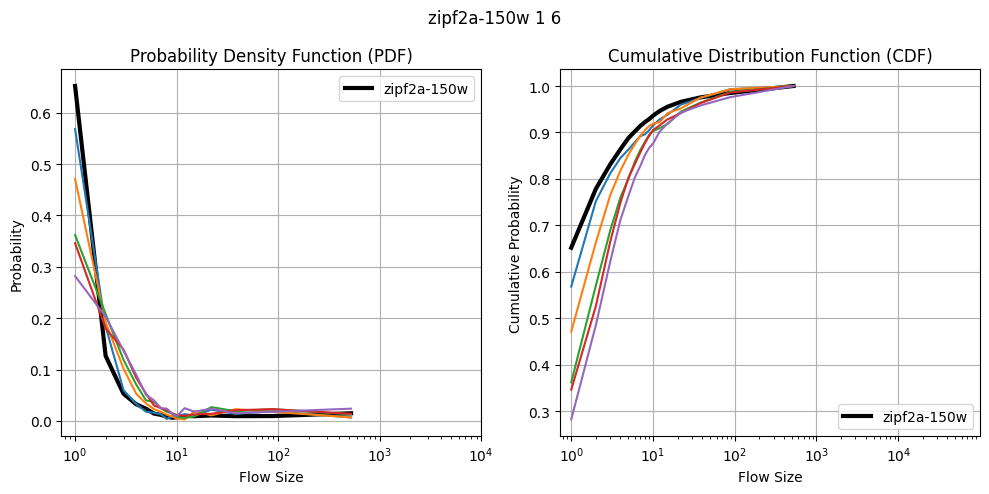

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 5, 87: 5, 88: 5, 89: 6, 90: 7, 91: 8, 92: 9, 93: 10, 94: 12, 95: 16, 96: 22, 97: 38, 98: 91, 99: 562}
[{1: 25130, 2: 4952, 3: 2062, 4: 1253, 5: 934, 6: 547, 7: 467, 8: 328, 9: 241, 10: 269, 12: 387, 16: 462, 22: 332, 38: 358, 91: 390, 562: 577}, {1: 624, 2: 139, 3: 64, 4: 15, 5: 17, 6: 13, 7: 15, 8: 9, 9: 8, 10: 7, 12: 15, 16: 13, 22: 15, 38: 19, 91: 14, 562: 13}, {1: 589, 2: 159, 3: 71, 4: 27, 5: 17

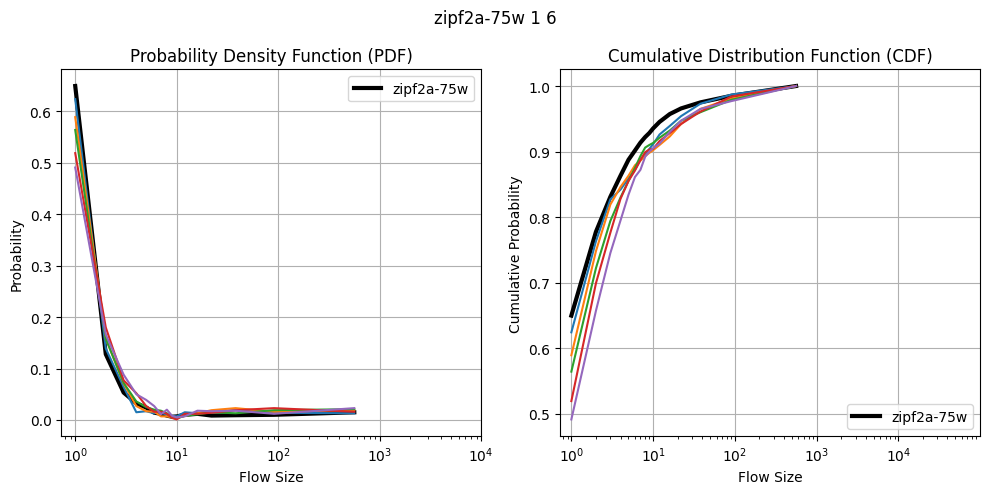

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 5, 87: 5, 88: 5, 89: 6, 90: 7, 91: 8, 92: 9, 93: 10, 94: 12, 95: 16, 96: 22, 97: 40, 98: 95, 99: 552}
[{1: 12632, 2: 2414, 3: 1021, 4: 639, 5: 477, 6: 266, 7: 237, 8: 178, 9: 107, 10: 136, 12: 184, 16: 223, 22: 157, 40: 198, 95: 187, 552: 288}, {1: 625, 2: 148, 3: 44, 4: 24, 5: 18, 6: 15, 7: 15, 8: 10, 9: 7, 10: 5, 12: 15, 16: 12, 22: 14, 40: 18, 95: 18, 552: 12}, {1: 629, 2: 137, 3: 55, 4: 21, 5: 19

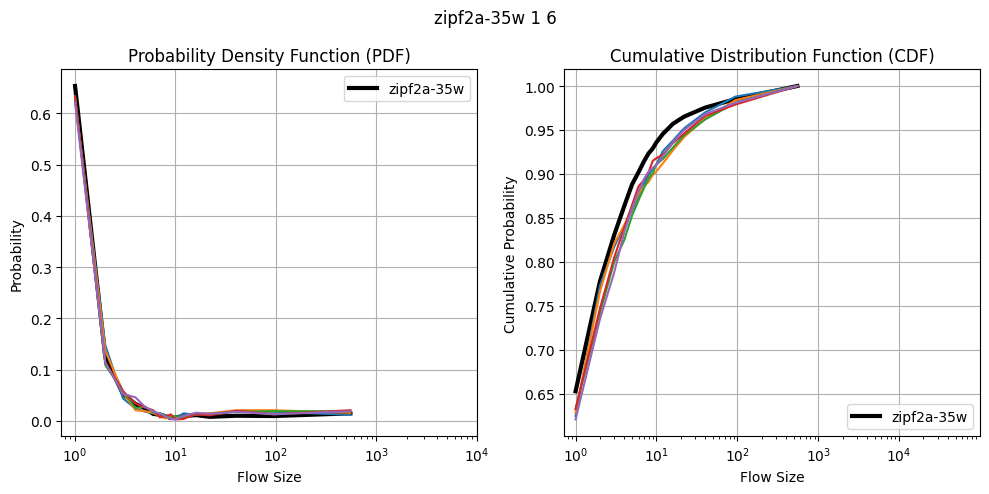

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 4, 88: 4, 89: 5, 90: 5, 91: 6, 92: 7, 93: 8, 94: 10, 95: 12, 96: 16, 97: 25, 98: 60, 99: 375}
[{1: 205974, 2: 30566, 3: 12257, 4: 7670, 5: 5388, 6: 3382, 7: 2529, 8: 1956, 10: 2945, 12: 2406, 16: 2577, 25: 2556, 60: 2814, 375: 4288}, {1: 195, 2: 161, 3: 122, 4: 126, 5: 87, 6: 72, 7: 56, 8: 37, 10: 57, 12: 26, 16: 25, 25: 14, 60: 13, 375: 9}, {1: 135, 2: 93, 3: 83, 4: 79, 5: 72, 6: 61, 7: 88, 8

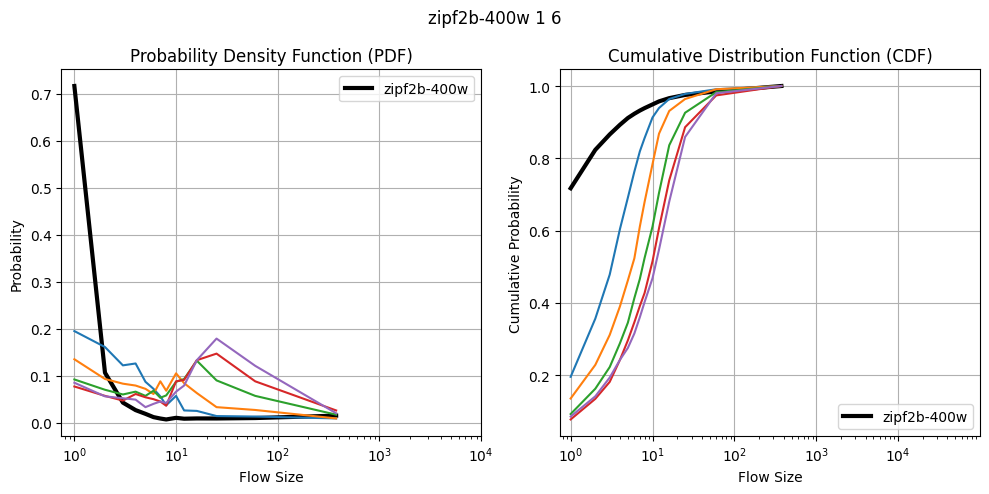

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 4, 88: 4, 89: 5, 90: 5, 91: 6, 92: 7, 93: 8, 94: 10, 95: 12, 96: 16, 97: 25, 98: 58, 99: 355}
[{1: 103014, 2: 15284, 3: 6086, 4: 3834, 5: 2722, 6: 1704, 7: 1270, 8: 941, 10: 1470, 12: 1157, 16: 1340, 25: 1299, 58: 1401, 355: 2132}, {1: 398, 2: 240, 3: 135, 4: 95, 5: 47, 6: 18, 7: 9, 8: 4, 10: 13, 12: 5, 16: 8, 25: 11, 58: 8, 355: 9}, {1: 254, 2: 188, 3: 157, 4: 104, 5: 82, 6: 63, 7: 40, 8: 20,

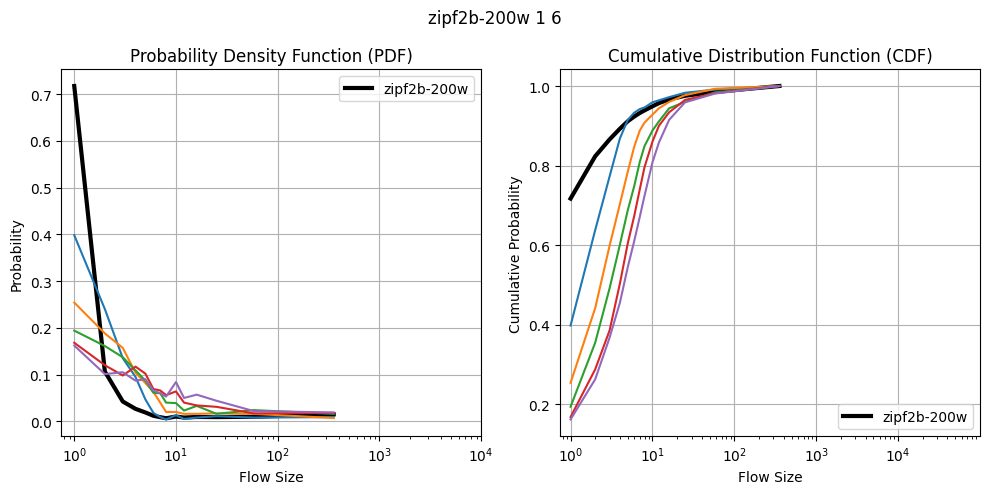

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 4, 88: 4, 89: 5, 90: 5, 91: 6, 92: 7, 93: 8, 94: 10, 95: 12, 96: 16, 97: 24, 98: 57, 99: 356}
[{1: 51542, 2: 7686, 3: 2986, 4: 1892, 5: 1366, 6: 874, 7: 627, 8: 446, 10: 752, 12: 602, 16: 686, 24: 600, 57: 699, 356: 1069}, {1: 635, 2: 200, 3: 57, 4: 26, 5: 13, 6: 5, 7: 6, 8: 1, 10: 6, 12: 6, 16: 9, 24: 12, 57: 14, 356: 10}, {1: 508, 2: 220, 3: 106, 4: 54, 5: 27, 6: 21, 7: 13, 8: 5, 10: 8, 12: 

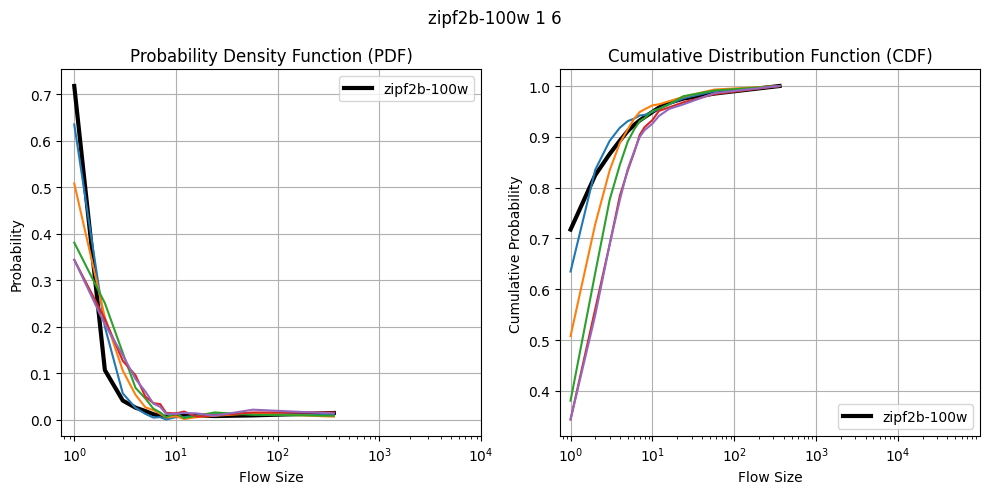

In [15]:
for file in pcap_file:
    plot_quantized_fsd(dataset=file, profiler=file[:-9])

### Plot quantized WMRD 

In [14]:
def plot_quantized_wmrd(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-500w_10_.pcap', window_size=200, profiler='caida0517-500w'):
    
    bins = prepare_profiler_bins()[profiler]
    fsd = read_fsd_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    print(bins)
    # for a in fsd:
    #     print(a)
    
    qfsd = []
        
    # get profiler qfsd
    profiler_fsd_path = f'/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/{profiler}.txt'
    profiler_fsd = {}
    with open(profiler_fsd_path, 'r') as f:
        for line in f:
            profiler_fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])        
    profiler_qfsd = get_quantized_mapping(profiler_fsd, bins) 
    # qfsd.append(profiler_qfsd)
    
    # get each window qfsd
    for item in fsd:
        qfsd.append(get_quantized_mapping(item, bins))
        
    print(qfsd)
        
    WMRDs = [None]
    for single_qfsd in qfsd:
        WMRD_nom = 0
        WMRD_denom = 0
        for bin in profiler_qfsd.keys():
            true = profiler_qfsd[bin]
            if bin in single_qfsd.keys():
                est = single_qfsd[bin]
            else:
                est = 0
            # print(i, true, est, est * (2**(base+1)))
            # print(bin, true, est, abs(true - est))
            WMRD_nom += abs(true - est)
            WMRD_denom += float(true + est)/2
        WMRD = WMRD_nom/WMRD_denom
        WMRDs.append(WMRD)
    print(WMRDs)
        
    plt.figure(figsize=(12, 4))
    
    plt.plot(WMRDs, label='MRD Var')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('WMRD')
    plt.title('%s Random K MRD (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 5, 60: 5, 61: 5, 62: 5, 63: 6, 64: 6, 65: 6, 66: 7, 67: 7, 68: 7, 69: 8, 70: 8, 71: 9, 72: 9, 73: 10, 74: 10, 75: 11, 76: 11, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 18, 83: 19, 84: 21, 85: 23, 86: 26, 87: 30, 88: 34, 89: 39, 90: 45, 91: 53, 92: 64, 93: 79, 94: 100, 95: 134, 96: 187, 97: 303, 98: 550, 99: 1541}
[{1: 47, 2: 83, 3: 102, 4: 93, 5: 96, 6: 94, 7: 69, 8: 62, 9: 42, 10: 27, 11: 31, 12: 24, 13: 21, 14: 14, 15: 16, 16: 14, 18: 35, 19: 12, 21: 16, 23: 7, 26: 21, 30: 16, 34: 10, 39: 11, 45: 9, 53: 9, 64: 4, 79: 7, 100: 2, 134: 2, 187: 1, 303: 3}, {1: 18, 2: 20, 3: 30, 4: 43, 

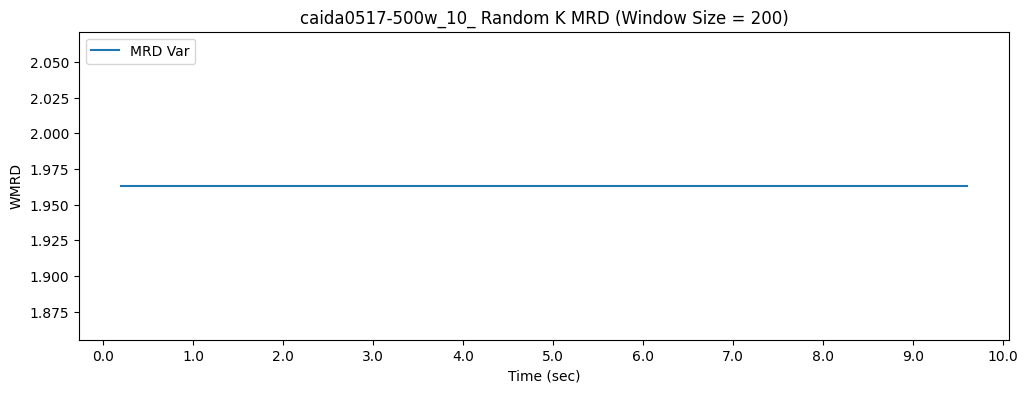

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 5, 60: 5, 61: 5, 62: 5, 63: 6, 64: 6, 65: 6, 66: 7, 67: 7, 68: 7, 69: 8, 70: 8, 71: 9, 72: 9, 73: 10, 74: 10, 75: 11, 76: 12, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 18, 83: 19, 84: 21, 85: 24, 86: 26, 87: 30, 88: 34, 89: 39, 90: 45, 91: 54, 92: 65, 93: 79, 94: 100, 95: 133, 96: 185, 97: 299, 98: 550, 99: 1494}
[{1: 205, 2: 180, 3: 150, 4: 96, 5: 67, 6: 48, 7: 35, 8: 29, 9: 15, 10: 14, 11: 9, 12: 16, 13: 16, 14: 6, 15: 9, 16: 7, 18: 12, 19: 5, 21: 7, 24: 15, 26: 4, 30: 9, 34: 2, 39: 7, 45: 7, 54: 6, 65: 2, 79: 8, 100: 4, 133: 3, 185: 1, 299: 2, 550: 1, 1494: 3}, {1: 114, 2: 123, 3:

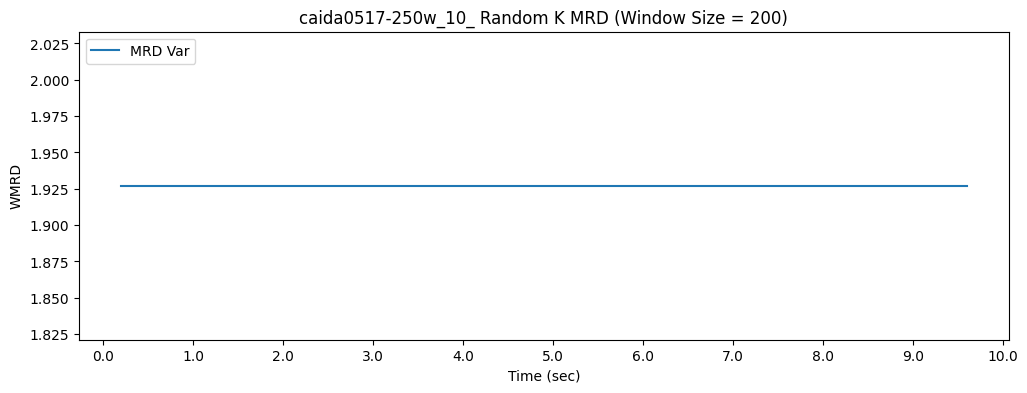

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 5, 60: 5, 61: 5, 62: 5, 63: 6, 64: 6, 65: 6, 66: 6, 67: 7, 68: 7, 69: 8, 70: 8, 71: 9, 72: 9, 73: 10, 74: 10, 75: 11, 76: 11, 77: 12, 78: 13, 79: 14, 80: 15, 81: 16, 82: 17, 83: 19, 84: 21, 85: 23, 86: 26, 87: 30, 88: 34, 89: 38, 90: 44, 91: 52, 92: 63, 93: 77, 94: 97, 95: 131, 96: 183, 97: 293, 98: 537, 99: 1608}
[{1: 382, 2: 195, 3: 94, 4: 59, 5: 47, 6: 28, 7: 23, 8: 17, 9: 9, 10: 21, 11: 11, 12: 4, 13: 3, 14: 10, 15: 7, 16: 3, 17: 4, 19: 10, 21: 6, 23: 5, 26: 8, 30: 7, 34: 3, 38: 6, 44: 9, 52: 2, 63: 8, 77: 2, 97: 2, 131: 5, 183: 5, 293: 1, 537: 3, 1608: 1}, {1: 281, 2: 193, 3: 108,

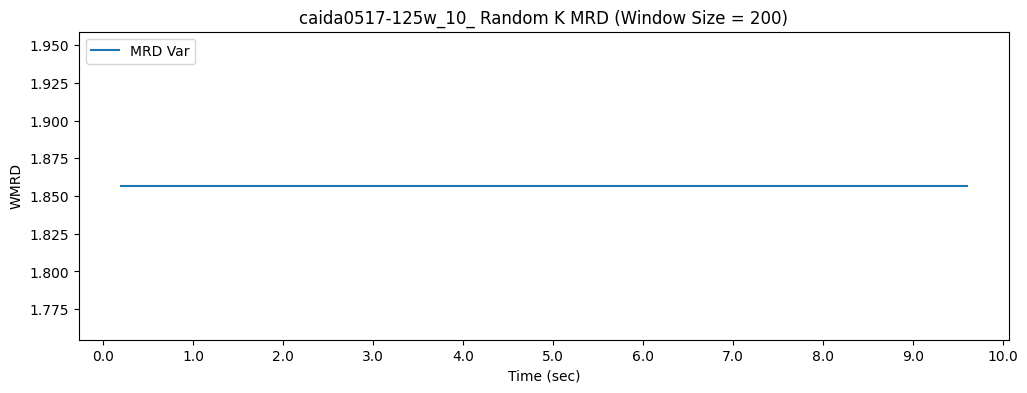

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 5, 59: 5, 60: 5, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 8, 68: 8, 69: 9, 70: 9, 71: 10, 72: 10, 73: 11, 74: 11, 75: 12, 76: 12, 77: 13, 78: 14, 79: 15, 80: 16, 81: 18, 82: 19, 83: 21, 84: 23, 85: 26, 86: 29, 87: 33, 88: 38, 89: 44, 90: 52, 91: 62, 92: 75, 93: 93, 94: 119, 95: 159, 96: 230, 97: 368, 98: 682, 99: 1789}
[{1: 25, 2: 61, 3: 92, 4: 102, 5: 84, 6: 70, 7: 67, 8: 54, 9: 51, 10: 45, 11: 26, 12: 34, 13: 22, 14: 29, 15: 19, 16: 13, 18: 32, 19: 10, 21: 30, 23: 18, 26: 17, 29: 25, 33: 18, 38: 8, 44: 14, 52: 9, 62: 9, 75: 3, 93: 4, 119: 2, 159: 3, 230: 3, 368: 1}, {1: 9, 2: 18, 3: 24

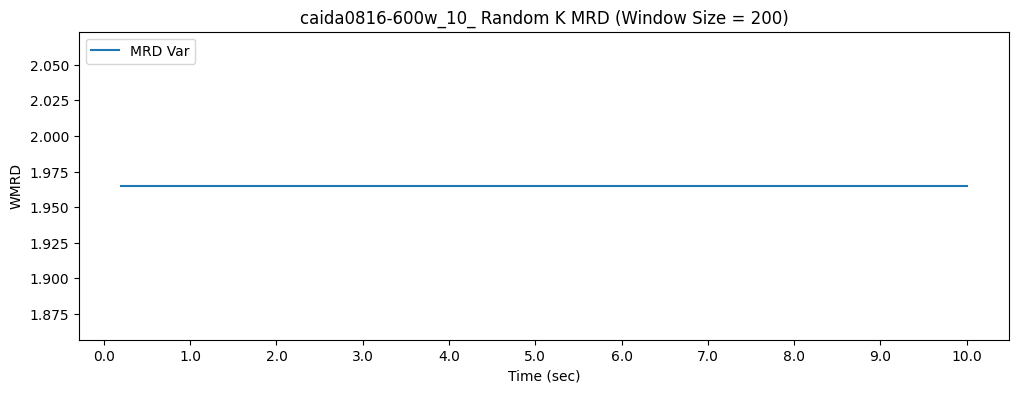

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 5, 59: 5, 60: 5, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 8, 68: 8, 69: 9, 70: 9, 71: 10, 72: 10, 73: 11, 74: 11, 75: 12, 76: 12, 77: 13, 78: 14, 79: 15, 80: 16, 81: 18, 82: 19, 83: 21, 84: 23, 85: 26, 86: 29, 87: 33, 88: 38, 89: 44, 90: 52, 91: 62, 92: 75, 93: 93, 94: 118, 95: 155, 96: 220, 97: 355, 98: 654, 99: 1722}
[{1: 191, 2: 160, 3: 137, 4: 94, 5: 68, 6: 54, 7: 36, 8: 26, 9: 29, 10: 24, 11: 16, 12: 16, 13: 12, 14: 6, 15: 7, 16: 5, 18: 13, 19: 6, 21: 16, 23: 12, 26: 5, 29: 6, 33: 7, 38: 8, 44: 5, 52: 5, 62: 10, 75: 7, 93: 4, 118: 6, 155: 2, 220: 4, 355: 2, 654: 1}, {1: 88, 2: 116, 

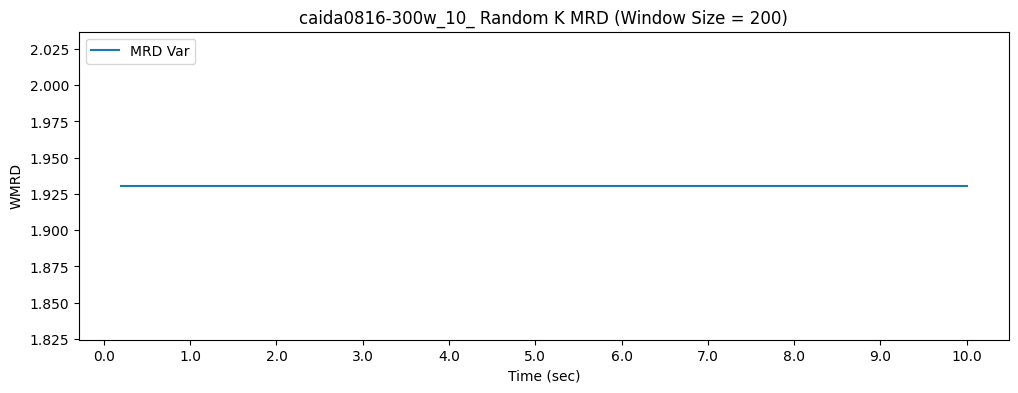

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 5, 59: 5, 60: 5, 61: 6, 62: 6, 63: 6, 64: 6, 65: 7, 66: 7, 67: 8, 68: 8, 69: 9, 70: 9, 71: 10, 72: 10, 73: 11, 74: 11, 75: 12, 76: 13, 77: 14, 78: 14, 79: 15, 80: 16, 81: 18, 82: 19, 83: 21, 84: 23, 85: 26, 86: 29, 87: 33, 88: 38, 89: 45, 90: 53, 91: 62, 92: 76, 93: 94, 94: 119, 95: 157, 96: 221, 97: 369, 98: 689, 99: 1728}
[{1: 339, 2: 193, 3: 101, 4: 68, 5: 53, 6: 35, 7: 17, 8: 18, 9: 19, 10: 19, 11: 18, 12: 13, 13: 6, 14: 4, 15: 3, 16: 9, 18: 11, 19: 4, 21: 7, 23: 7, 26: 8, 29: 10, 33: 2, 38: 8, 45: 6, 62: 3, 76: 6, 94: 4, 119: 3, 157: 1, 221: 1, 369: 3, 689: 1}, {1: 232, 2: 192, 3: 114, 4

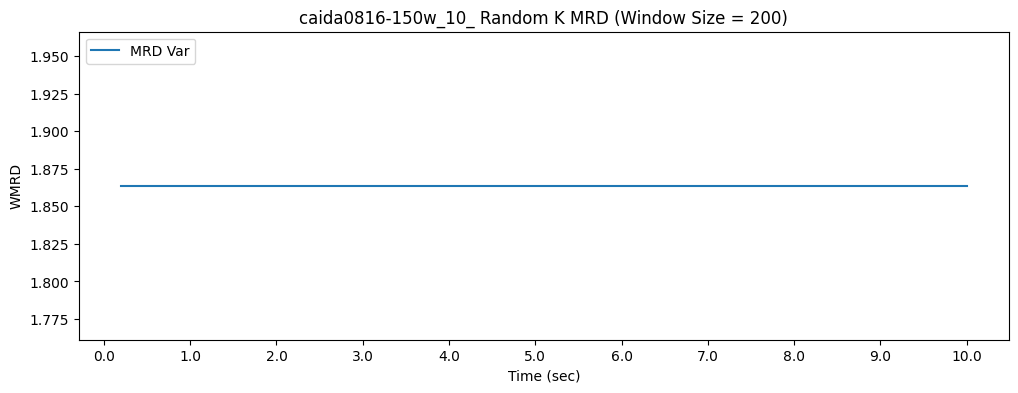

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 5, 87: 5, 88: 5, 89: 6, 90: 7, 91: 8, 92: 9, 93: 10, 94: 12, 95: 15, 96: 22, 97: 38, 98: 88, 99: 523}
[{1: 435, 2: 247, 3: 92, 4: 59, 5: 13, 6: 22, 7: 17, 8: 7, 9: 8, 10: 8, 12: 9, 15: 9, 22: 26, 38: 18, 88: 21, 523: 9}, {1: 274, 2: 262, 3: 143, 4: 100, 5: 51, 6: 29, 7: 21, 8: 18, 9: 10, 10: 5, 12: 7, 15: 13, 22: 23, 38: 15, 88: 17, 523: 12}, {1: 170, 2: 218, 3: 197, 4: 110, 5: 80, 6: 53, 7: 37, 8: 1

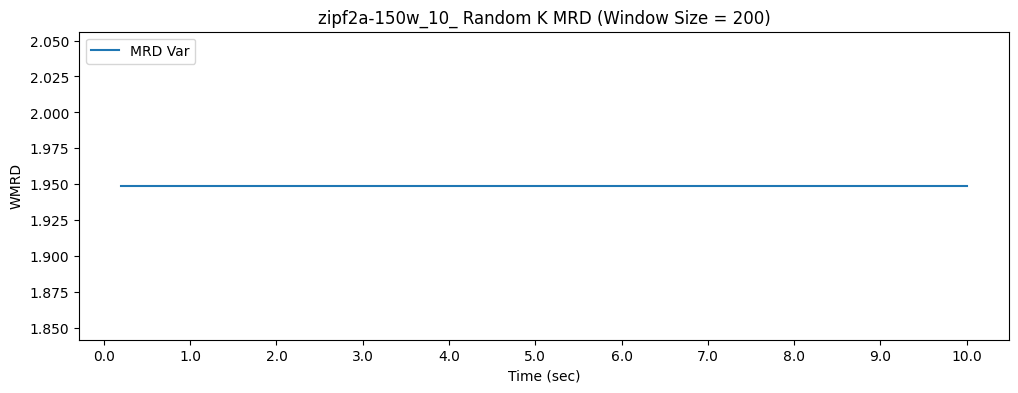

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 5, 87: 5, 88: 5, 89: 6, 90: 7, 91: 8, 92: 9, 93: 10, 94: 12, 95: 16, 96: 22, 97: 38, 98: 91, 99: 562}
[{1: 585, 2: 156, 3: 64, 4: 23, 5: 25, 6: 21, 7: 13, 8: 13, 9: 14, 10: 8, 12: 10, 16: 11, 22: 15, 38: 22, 91: 9, 562: 11}, {1: 514, 2: 188, 3: 81, 4: 47, 5: 28, 6: 16, 7: 14, 8: 10, 9: 5, 10: 4, 12: 8, 16: 15, 22: 15, 38: 19, 91: 23, 562: 13}, {1: 435, 2: 234, 3: 111, 4: 47, 5: 31, 6: 13, 7: 15, 8: 1

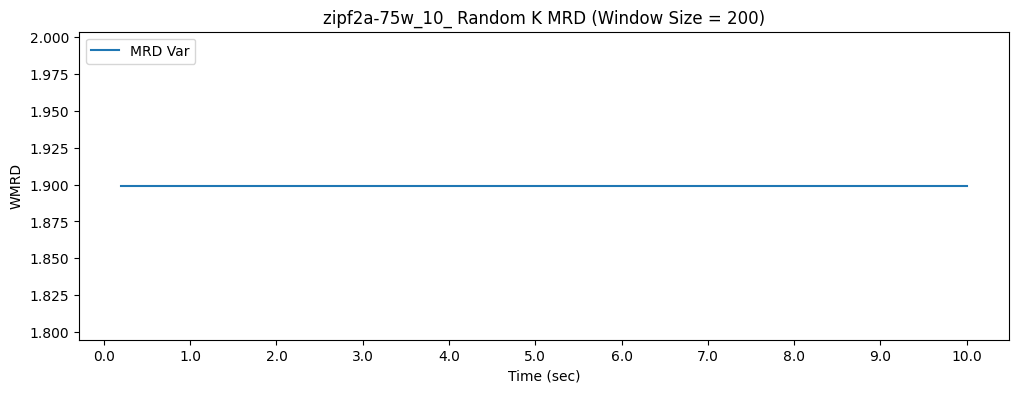

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 5, 87: 5, 88: 5, 89: 6, 90: 7, 91: 8, 92: 9, 93: 10, 94: 12, 95: 16, 96: 22, 97: 40, 98: 95, 99: 552}
[{1: 613, 2: 157, 3: 44, 4: 26, 5: 18, 6: 19, 7: 11, 8: 10, 9: 7, 10: 5, 12: 15, 16: 10, 22: 16, 40: 21, 95: 19, 552: 9}, {1: 605, 2: 146, 3: 66, 4: 26, 5: 18, 6: 23, 7: 10, 8: 6, 9: 9, 10: 6, 12: 4, 16: 14, 22: 19, 40: 17, 95: 16, 552: 15}, {1: 594, 2: 142, 3: 61, 4: 39, 5: 26, 6: 10, 7: 13, 8: 11, 

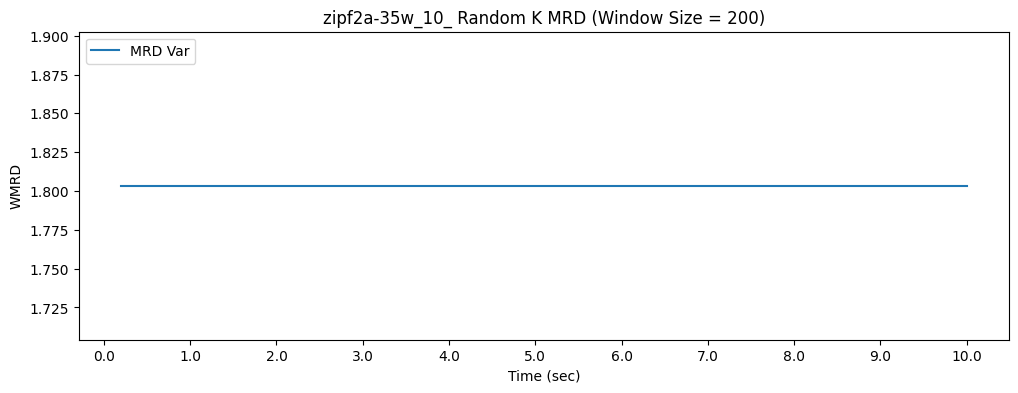

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 4, 88: 4, 89: 5, 90: 5, 91: 6, 92: 7, 93: 8, 94: 10, 95: 12, 96: 16, 97: 25, 98: 60, 99: 375}
[{2: 6, 3: 34, 4: 68, 5: 122, 6: 111, 7: 148, 8: 129, 10: 179, 12: 82, 16: 65, 25: 32, 60: 18, 375: 6}, {3: 3, 4: 8, 5: 12, 6: 24, 7: 48, 8: 65, 10: 170, 12: 171, 16: 258, 25: 158, 60: 71, 375: 12}, {3: 1, 4: 4, 5: 4, 6: 15, 7: 11, 8: 16, 10: 85, 12: 124, 16: 269, 25: 308, 60: 140, 375: 23}, {5: 1, 6:

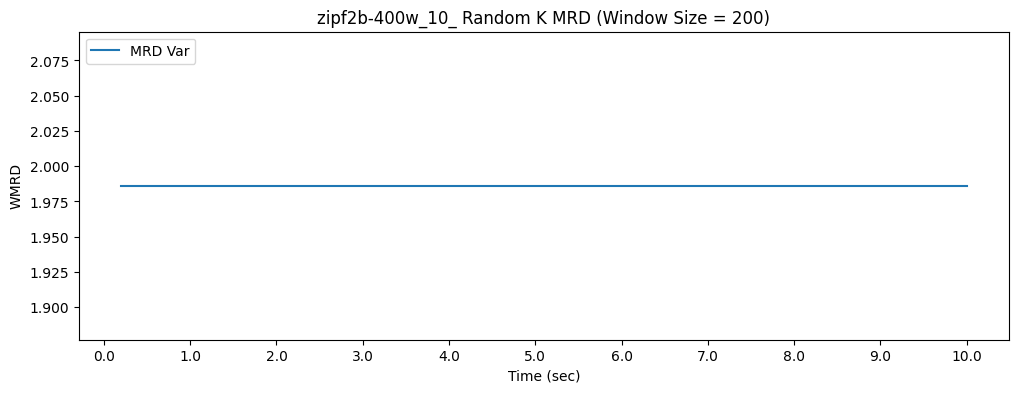

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 4, 88: 4, 89: 5, 90: 5, 91: 6, 92: 7, 93: 8, 94: 10, 95: 12, 96: 16, 97: 25, 98: 58, 99: 355}
[{1: 67, 2: 203, 3: 246, 4: 195, 5: 107, 6: 69, 7: 40, 8: 14, 10: 7, 12: 12, 16: 13, 25: 14, 58: 9, 355: 4}, {1: 12, 2: 55, 3: 123, 4: 159, 5: 156, 6: 134, 7: 123, 8: 82, 10: 65, 12: 29, 16: 26, 25: 10, 58: 14, 355: 12}, {1: 5, 2: 20, 3: 42, 4: 86, 5: 126, 6: 136, 7: 126, 8: 110, 10: 141, 12: 72, 16: 

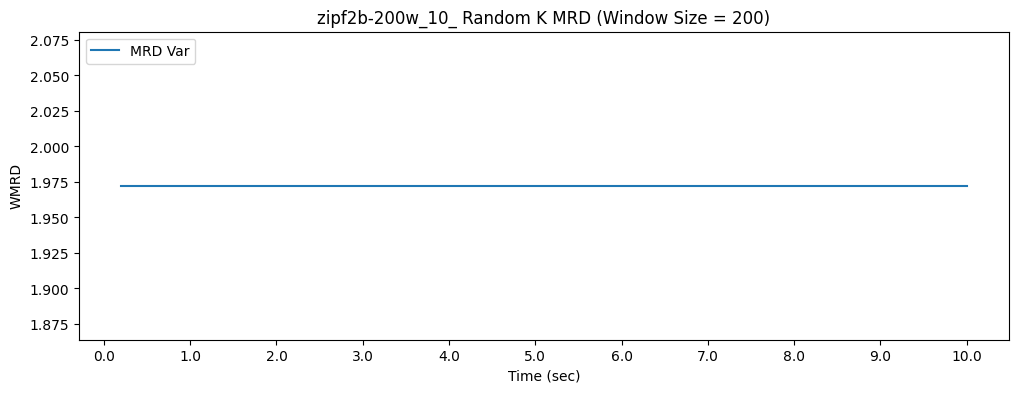

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 4, 88: 4, 89: 5, 90: 5, 91: 6, 92: 7, 93: 8, 94: 10, 95: 12, 96: 16, 97: 24, 98: 57, 99: 356}
[{1: 374, 2: 356, 3: 143, 4: 49, 5: 15, 6: 15, 7: 7, 8: 7, 10: 5, 12: 1, 16: 5, 24: 8, 57: 6, 356: 9}, {1: 152, 2: 295, 3: 239, 4: 123, 5: 70, 6: 40, 7: 10, 8: 10, 10: 20, 12: 3, 16: 7, 24: 5, 57: 14, 356: 12}, {1: 92, 2: 190, 3: 225, 4: 182, 5: 105, 6: 63, 7: 40, 8: 22, 10: 14, 12: 13, 16: 12, 24: 7,

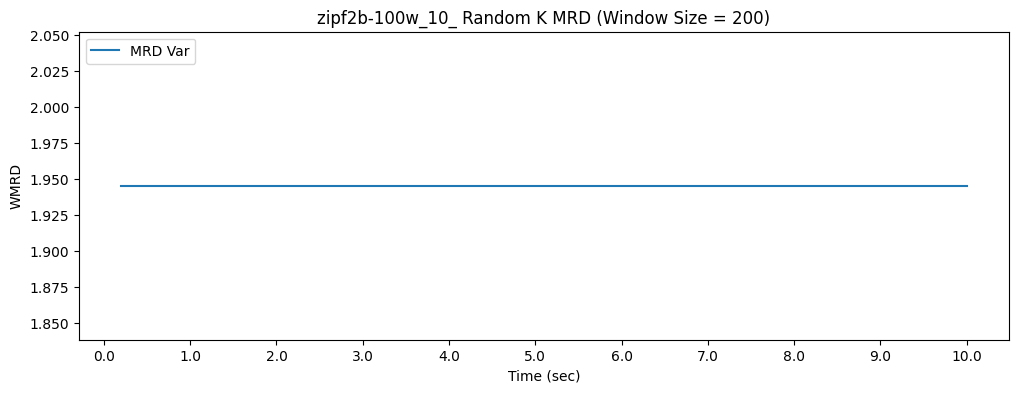

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 2, 97: 2, 98: 2, 99: 11}
[{1: 4, 2: 26, 11: 970}, {2: 2, 11: 998}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {11: 1000}, {1

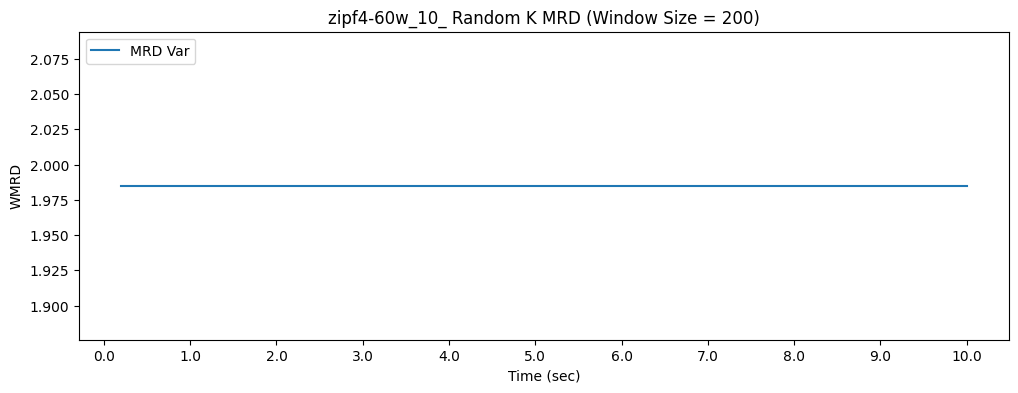

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 2, 97: 2, 98: 2, 99: 12}
[{1: 100, 2: 334, 12: 566}, {1: 21, 2: 100, 12: 879}, {1: 10, 2: 41, 12: 949}, {1: 2, 2: 27, 12: 971}, {1: 1, 2: 10, 12: 989}, {1: 2, 2: 6, 12: 992}, {2: 2, 12: 998}, {2: 1, 12: 999}, {2: 2, 12: 998}, {12: 1000}, {12: 1000}, {12: 1000}, {12: 1000}, {12: 1000}, {12: 1000}, {12: 1000}, {12: 1000}, {12: 1000},

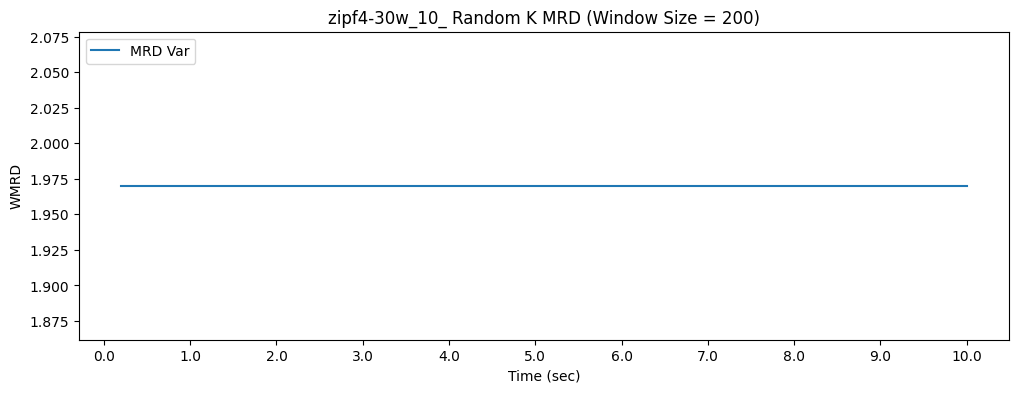

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 2, 97: 2, 98: 2, 99: 12}
[{1: 486, 2: 390, 12: 124}, {1: 255, 2: 402, 12: 343}, {1: 144, 2: 329, 12: 527}, {1: 90, 2: 282, 12: 628}, {1: 66, 2: 225, 12: 709}, {1: 36, 2: 161, 12: 803}, {1: 28, 2: 108, 12: 864}, {1: 16, 2: 80, 12: 904}, {1: 13, 2: 70, 12: 917}, {1: 9, 2: 48, 12: 943}, {1: 2, 2: 45, 12: 953}, {1: 2, 2: 20, 12: 978}, 

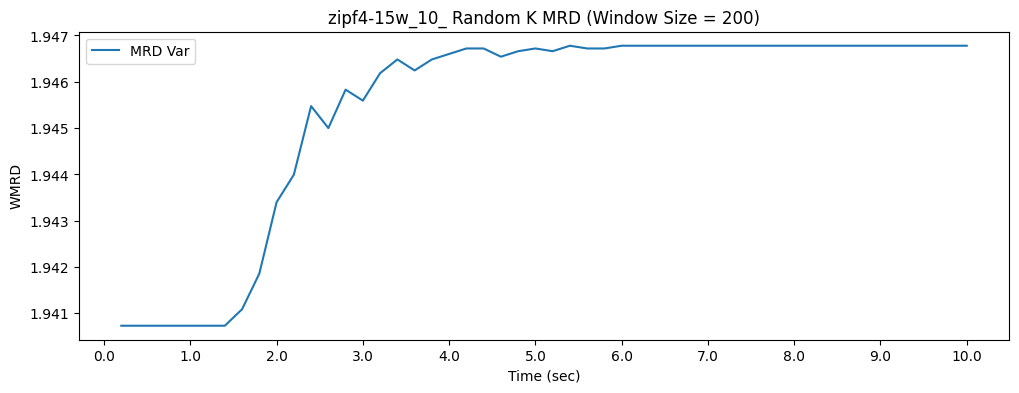

In [ ]:
for file in pcap_file:
    plot_quantized_wmrd(dataset=file, profiler=file[:-9])

### Plot MRD

In [ ]:
def plot_mrd(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-500w_10_.pcap', window_size=200, profilers=['caida0517-500w']):
    
    res = []
    label = []
    
    for profiler in profilers:
    
        bins = prepare_profiler_bins()[profiler]
        fsd = read_fsd_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
        
        # print(bins)
            
        # get profiler qfsd
        profiler_fsd_path = f'/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/{profiler}.txt'
        profiler_fsd = {}
        with open(profiler_fsd_path, 'r') as f:
            for line in f:
                profiler_fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])        

        WMRDs = [None]
        for single_fsd in fsd:
            WMRD_nom = 0
            WMRD_denom = 0
            for bin in profiler_fsd.keys():
                true = profiler_fsd[bin]
                if bin in single_fsd.keys():
                    est = single_fsd[bin]
                else:
                    est = 0
                # print(i, true, est, est * (2**(base+1)))
                WMRD_nom += abs(true - est)
                WMRD_denom += float(true + est)/2
            WMRD = WMRD_nom/WMRD_denom
            WMRDs.append(WMRD)
        # print(WMRDs)
        
        res.append(WMRDs)
        label.append(profiler)
        
    plt.figure(figsize=(12, 4))
    
    plt.plot(res[0], label=label[0], color='tab:red', linewidth=3.0)
    for i in range(1, len(res)):
        plt.plot(res[i], label=label[i])

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('MRD')
    plt.title('%s Random K MRD (Window Size = %d)' % (dataset[:-9], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

In [ ]:
profilers = []
for item in pcap_file:
    profilers.append(item[:-9])
    
# # CAIDA0517 <-> CAIDA0816
# for i in range(0,3):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[3:6])
    
# for i in range(3,6):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[0:3])


# # ZIPF2a <-> ZIPF2b
# for i in range(6,9):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[9:12])
    
# for i in range(9,12):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[6:9])


# # CAIDA -> ZIPF2a
# for i in range(0,3):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[6:9])
    
# for i in range(3,6):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[6:9])


# # CAIDA -> ZIPF2b
# for i in range(0,3):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[9:12])
    
# for i in range(3,6):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[9:12])
    
    
# # ZIPF2a -> CAIDA
# for i in range(6,9):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[0:3])
    
# for i in range(6,9):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[3:6])
    
    
# ZIPF2b -> CAIDA
# for i in range(9,12):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[0:3])
    
# for i in range(9,12):
#     plot_mrd(dataset=pcap_file[i], profilers=[profilers[i]] + profilers[3:6])
    



---

In [22]:
def plot_mrd2(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-500w_10_.pcap'], window_size=200, profiler='caida0517-500w'):
    
    res = []
    label = []
    
    for d in datasets:
    
        bins = prepare_profiler_bins()[profiler]
        fsd = read_fsd_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        # print(bins)
            
        # get profiler qfsd
        profiler_fsd_path = f'/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist/{profiler}.txt'
        profiler_fsd = {}
        with open(profiler_fsd_path, 'r') as f:
            for line in f:
                profiler_fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])        

        WMRDs = [None]
        for single_fsd in fsd:
            WMRD_nom = 0
            WMRD_denom = 0
            for bin in profiler_fsd.keys():
                true = profiler_fsd[bin]
                if bin in single_fsd.keys():
                    est = single_fsd[bin]
                else:
                    est = 0
                # print(i, true, est, est * (2**(base+1)))
                WMRD_nom += abs(true - est)
                WMRD_denom += float(true + est)/2
            WMRD = WMRD_nom/WMRD_denom
            WMRDs.append(WMRD)
        # print(WMRDs)
        
        res.append(WMRDs)
        label.append(d[:-5])
        
    plt.figure(figsize=(12, 4))
    
    plt.plot(res[0], label=label[0], color='tab:red', linewidth=3.0)
    for i in range(1, len(res)):
        plt.plot(res[i], label=label[i])

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('MRD')
    plt.title('Profiler = %s ,Random K MRD' % (profiler))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()

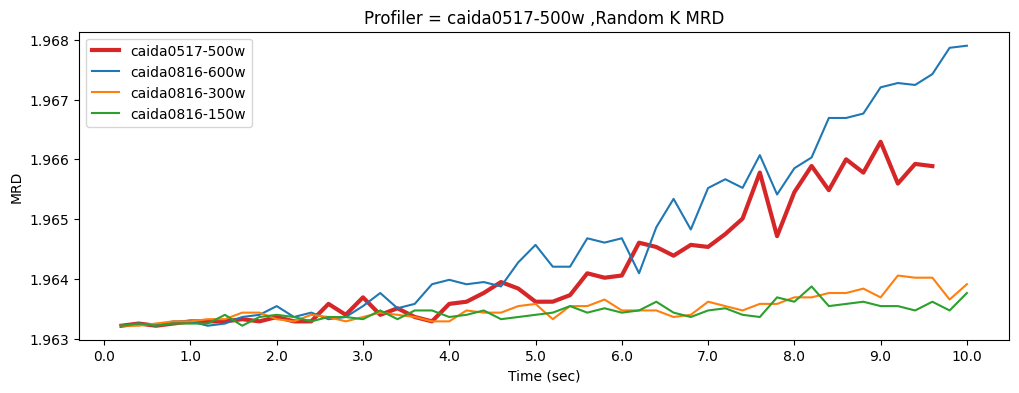

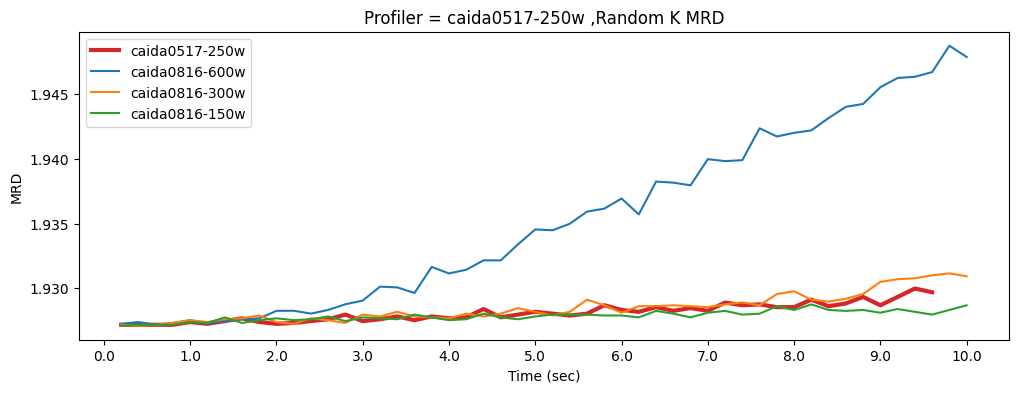

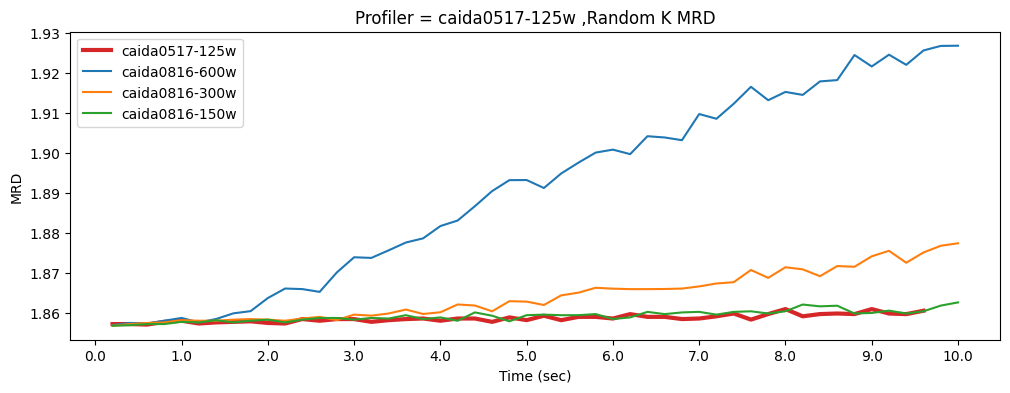

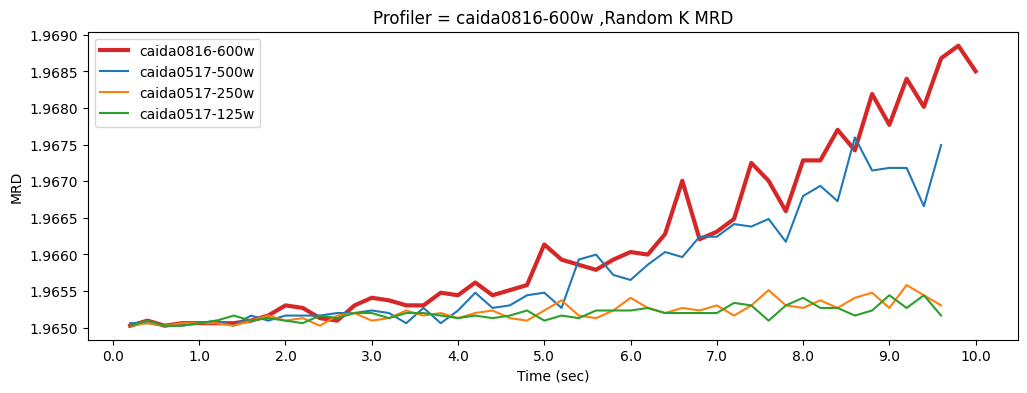

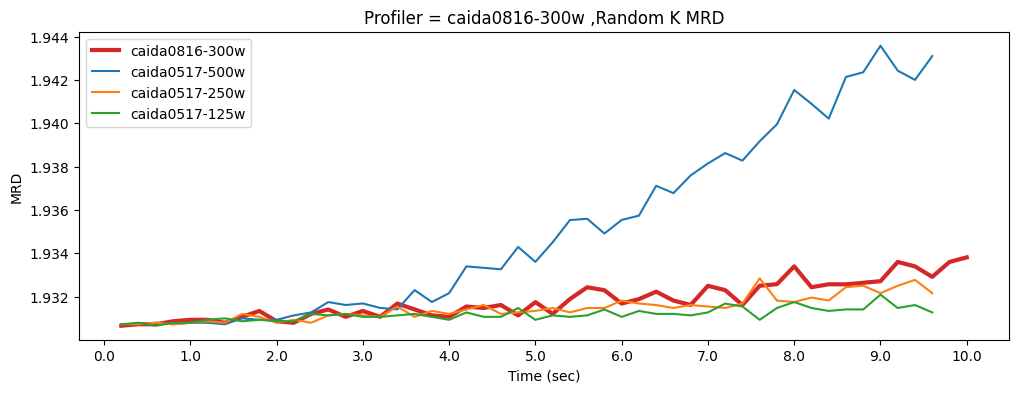

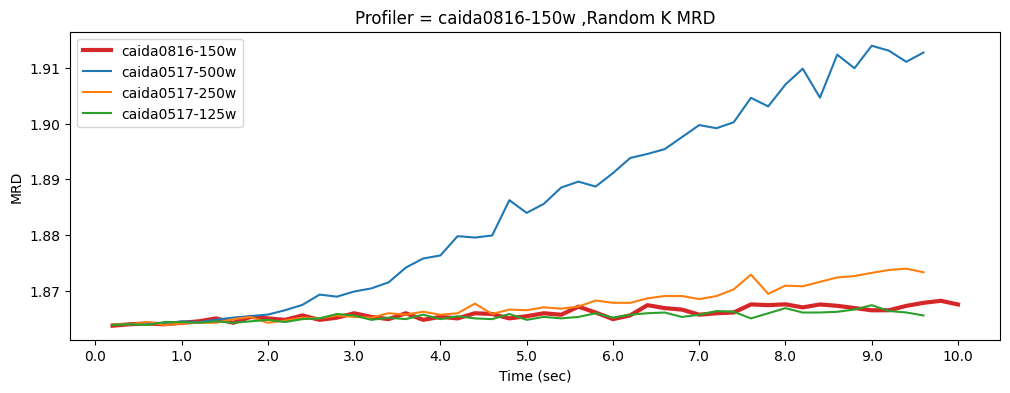

In [ ]:
profilers = []
for item in pcap_file:
    profilers.append(item[:-9])
    
# # # CAIDA0517 <-> CAIDA0816
# for i in range(0,3):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[3:6], profiler=profilers[i])
    
# for i in range(3,6):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[0:3], profiler=profilers[i])


# # ZIPF2a <-> ZIPF2b
# for i in range(6,9):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[9:12], profiler=profilers[i])
    
# for i in range(9,12):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[6:9], profiler=profilers[i])


# # CAIDA -> ZIPF2a
# for i in range(0,3):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[6:9], profiler=profilers[i])
    
# for i in range(3,6):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[6:9], profiler=profilers[i])


# # CAIDA -> ZIPF2b
# for i in range(0,3):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[9:12], profiler=profilers[i])
    
# for i in range(3,6):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[9:12], profiler=profilers[i])
    
    
# # ZIPF2a -> CAIDA
# for i in range(6,9):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[0:3], profiler=profilers[i])
    
# for i in range(6,9):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[3:6], profiler=profilers[i])
    
    
# ZIPF2b -> CAIDA
# for i in range(9,12):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[0:3], profiler=profilers[i])
    
# for i in range(9,12):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[3:6], profiler=profilers[i])
    



['caida0517-500w', 'caida0517-250w', 'caida0517-125w', 'caida0816-600w', 'caida0816-300w', 'caida0816-150w', 'zipf2a-150w', 'zipf2a-75w', 'zipf2a-35w', 'zipf2b-400w', 'zipf2b-200w', 'zipf2b-100w']


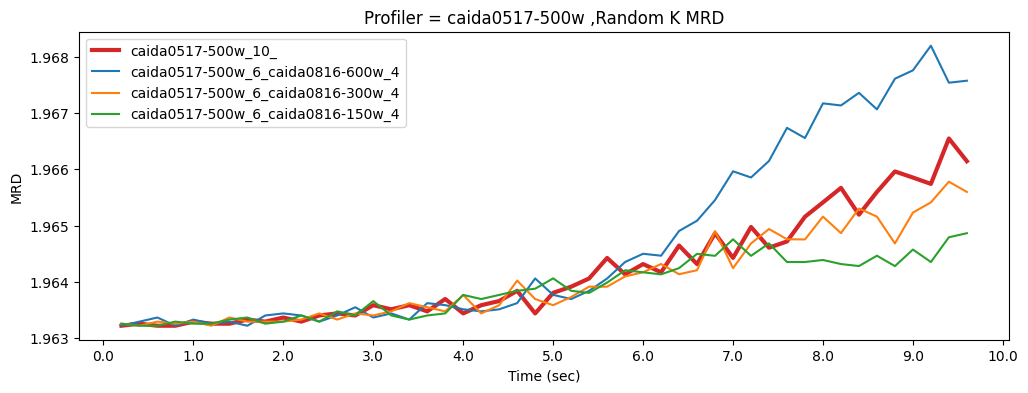

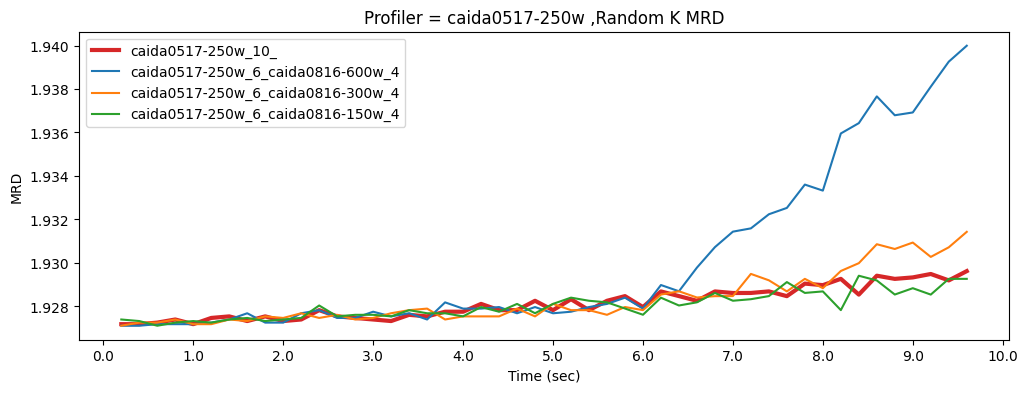

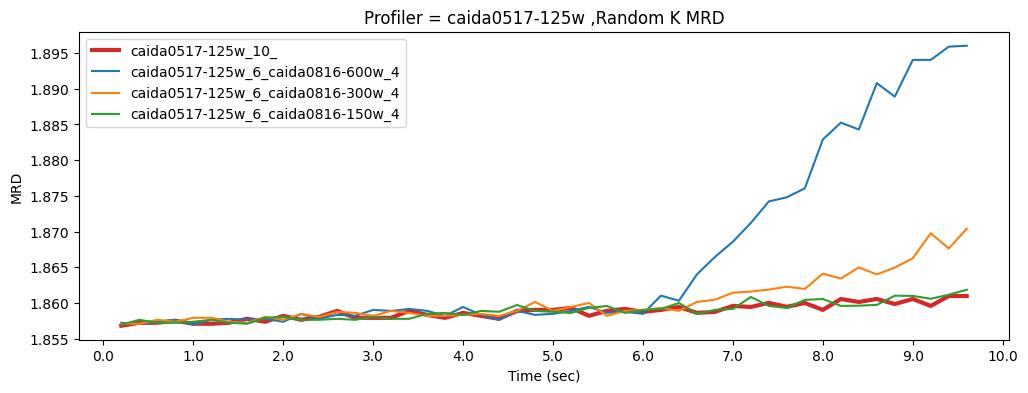

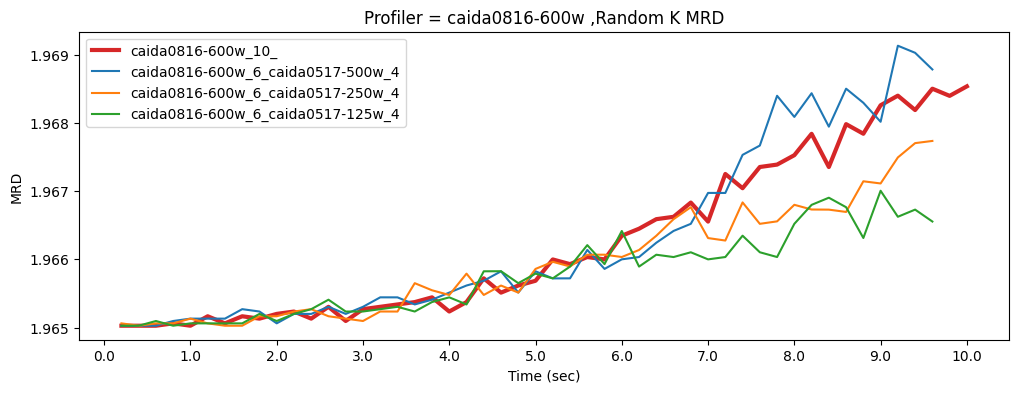

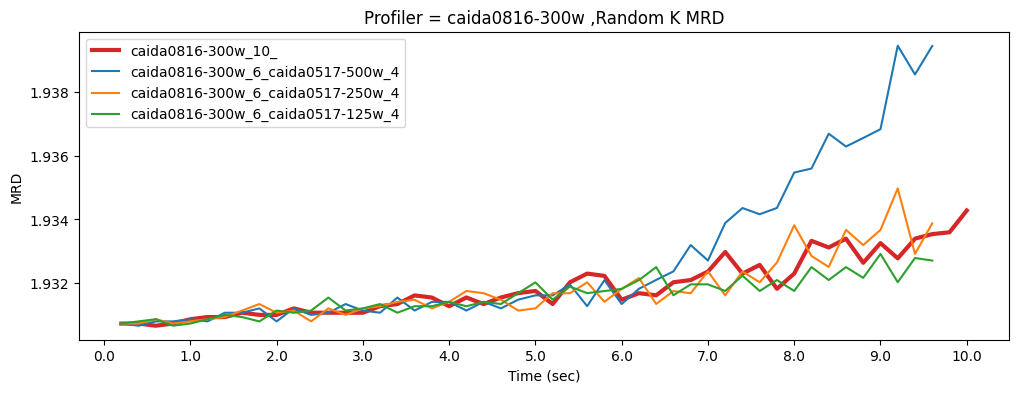

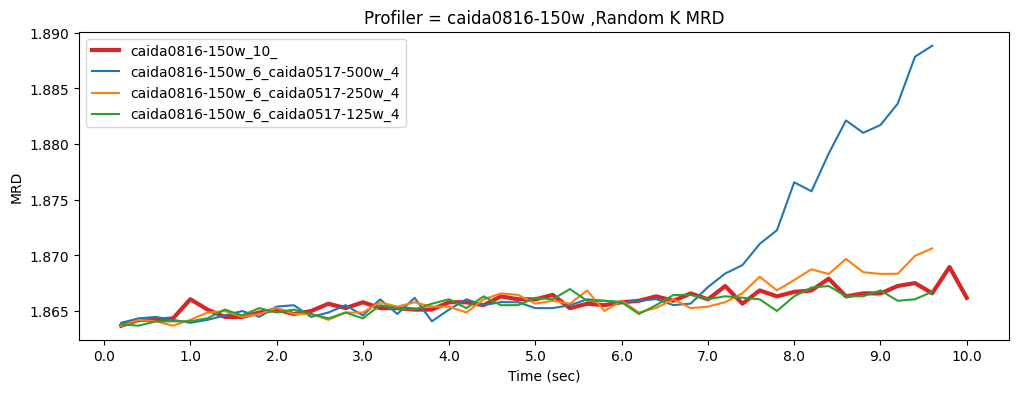

In [23]:
profilers = []
for item in pcap_file[:12]:
    profilers.append(item[:-9])
    
print(profilers)
    
# CAIDA0517 <-> CAIDA0816
for i in range(0, len(pcap_file[12:]), 3):
    # plot_mrd2(datasets=[pcap_file[9+int(i/3)]] + pcap_file[12+i:15+i], profiler=profilers[9+int(i/3)]) 
    plot_mrd2(datasets=[pcap_file[int(i/3)]] + pcap_file[12+i:15+i], profiler=profilers[int(i/3)]) 
    
# # # CAIDA0517 <-> CAIDA0816
# for i in range(0,3):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[3:6], profiler=profilers[i])
    
# for i in range(3,6):
#     plot_mrd2(datasets=[pcap_file[i]] + pcap_file[0:3], profiler=profilers[i])